In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

from IPython.core.pylabtools import figsize

import numpy.random as r
from pylab import *
from matplotlib.gridspec import GridSpec

import sys
sys.path.insert(0, '../../utils')
import splicing_utils as spu
import single_cell_plots as scp
from single_cell_plots import *

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"


In [2]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()

/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: Matpl

In [3]:
data_dir = '../../../data/' # adjust to the proper directory
trapnell = spu.get_psi_table(data_dir+'trapnell/Trapnell_SJ_counts_all.tab', minJR=1, minCell=1, drop_duplicates = False)
chen = spu.get_psi_table('chen_SJ_counts_unique_map.tab', minJR=1, minCell=1, drop_duplicates = False)
das = spu.get_psi_table('das_SJ_counts_unique_map.tab', minJR=1, minCell=1, drop_duplicates = False)
song = spu.get_psi_table(data_dir+'song/Song_SJ_counts.tab', minJR=1, minCell=1, drop_duplicates = False)
lescroart = spu.get_psi_table('lescroart_SJ_counts_unique_map.tab', minJR=1, minCell=1, drop_duplicates = False)
shalek = spu.get_psi_table('shalek_SJ_counts_new_annotation.tab', minJR=1, minCell=1, drop_duplicates = False)

In [4]:
shalek_Acpp = pd.read_csv('shalek_SJ_counts_Acpp.tab', sep='\t', index_col=0)

In [5]:
shalek_PSI = shalek[3]
shalek_read_counts = shalek[4]

In [6]:
shalek_PSI = shalek_PSI.T
shalek_PSI['Acpp_AE'] = shalek_Acpp.loc['Acpp_E1'] / shalek_Acpp.sum()
shalek_PSI = shalek_PSI.T

In [7]:
shalek_read_counts = shalek_read_counts.T
shalek_read_counts['Acpp_AE'] = shalek_Acpp.sum()
shalek_read_counts = shalek_read_counts.T

In [8]:
chen_hist_complete, chen_hist_intermediate = scp.get_bins_table(chen[3], chen[4])
trapnell_hist_complete, trapnell_hist_intermediate = scp.get_bins_table(trapnell[3], trapnell[4])
song_hist_complete, song_hist_intermediate = scp.get_bins_table(song[3], song[4])
das_hist_complete, das_hist_intermediate = scp.get_bins_table(das[3], das[4])
lescroart_hist_complete, lescroart_hist_intermediate = scp.get_bins_table(lescroart[3], lescroart[4])
shalek_hist_complete, shalek_hist_intermediate = scp.get_bins_table(shalek_PSI, shalek[4])

/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: Matpl

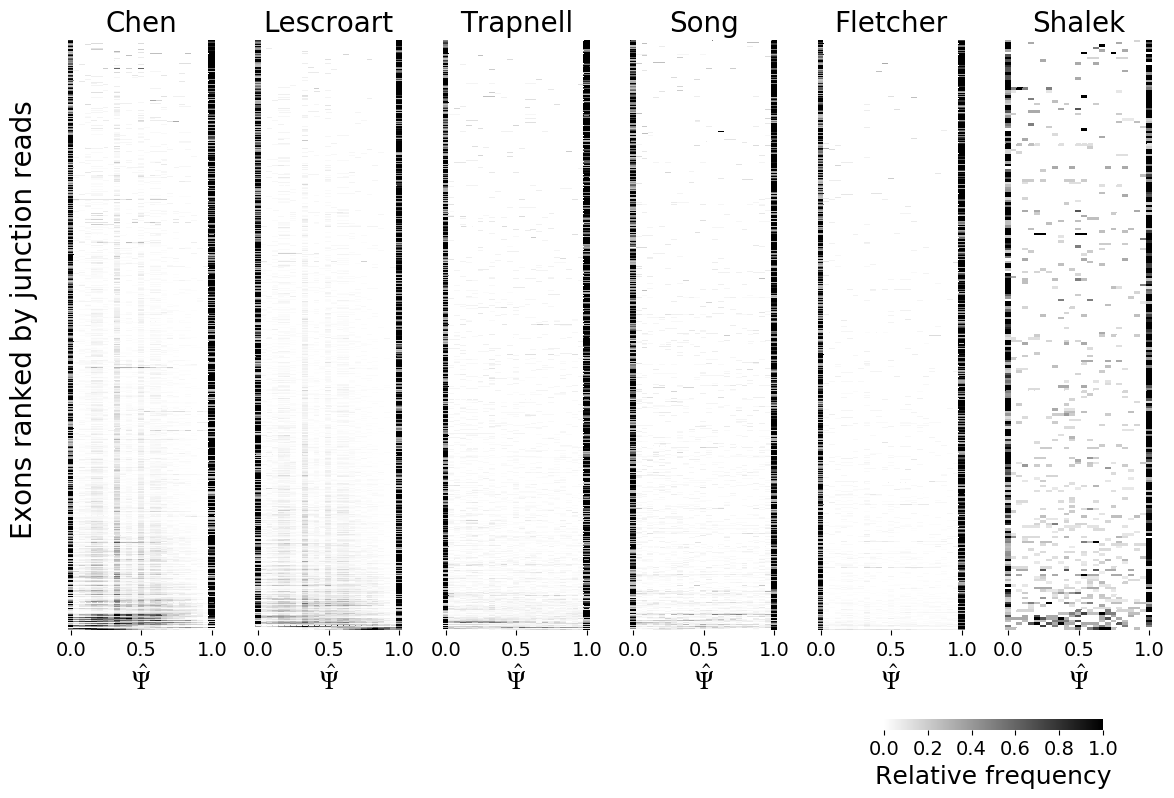

In [9]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

hist_list = [chen_hist_intermediate, lescroart_hist_intermediate, trapnell_hist_intermediate,
             song_hist_intermediate, das_hist_intermediate, shalek_hist_intermediate]

dset_name_list = ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Fletcher', 'Shalek']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions',
                    plot_title = "", 
                    ylab='Exons ranked by junction reads', ls=18, sk=1.65, tfs=20)

plt.show()

../../utils/single_cell_plots.py:741: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


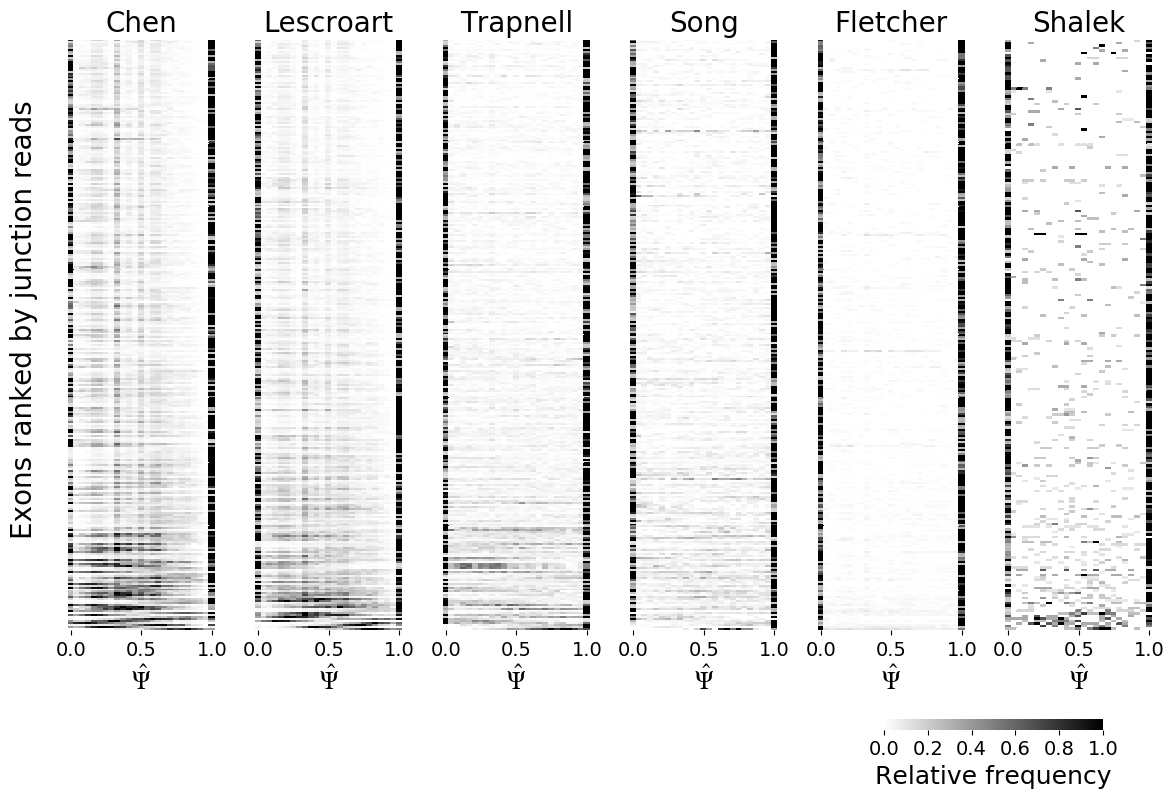

In [10]:
hist_list_300 = [x.loc[x.index[-300:]] for x in hist_list]
#scp.plot_histograms(hist_list_300, dset_name_list,fig_len=15, plot_name = 'PSI_distributions_top300')

scp.plot_histograms(hist_list_300, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_top300',
                    plot_title = "", 
                    ylab='Exons ranked by junction reads', ls=18, sk=1.65, tfs=20)

plt.show()

In [1]:
shalek_PSI.shape

NameError: name 'shalek_PSI' is not defined

In [11]:
chen_PSI = chen[3]
chen_read_counts = chen[4]

chen_meta_pseudotime = pd.read_csv('../../../data/chen/chen.meta_pseudotime.tab', sep='\t', index_col=0)
ES2i = chen_meta_pseudotime.index[chen_meta_pseudotime.cell_type == 'ES2i']
ES = chen_meta_pseudotime.index[chen_meta_pseudotime.cell_type == 'ES']
Epi = chen_meta_pseudotime.index[chen_meta_pseudotime.cell_type == 'Epi']
MN = chen_meta_pseudotime.index[chen_meta_pseudotime.cell_type == 'Motor neuron']
bio = list(ES2i) + list(ES) + list(Epi) + list(MN)
chen_tpm_tab = pd.read_csv('../../../data/chen/chen.tpm.gene_symbols.tab', sep='\t', index_col=0)[bio]
chen_star_tab = pd.read_csv('../../../data/chen/chen.star.counts.tab', sep='\t', index_col=0)[bio]
chen_rsem_tab = pd.read_csv('../../../data/chen/chen.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[bio]
chen_el = pd.read_csv('../../../data/chen/chen.effective_length.gene_symbols.tab', sep='\t', index_col=0)[bio]
crpm_chen = pd.read_csv('../../../data/chen/chen_sr_score.tab', sep='\t', index_col = 0)[bio]
chen_mrna_counts = pd.read_csv('../../../data/chen/chen_mrna_counts.tab', sep='\t', index_col=0)[bio]
chen_rsem_tab = pd.read_csv('../../../data/chen/chen.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)

###############################

lescroart_PSI = lescroart[3]
lescroart_read_counts = lescroart[4]
lescroart_bio = lescroart_PSI.columns
lescroart_tpm_tab = pd.read_csv('../../../data/lescroart/Lescroart.tpm.gene_symbols.tab', sep='\t', index_col=0)[lescroart_bio]
lescroart_star_tab = pd.read_csv('../../../data/lescroart/Lescroart.star.counts.tab', sep='\t', index_col=0)[lescroart_bio]
lescroart_rsem_tab = pd.read_csv('../../../data/lescroart/Lescroart.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[lescroart_bio]
lescroart_el = pd.read_csv('../../../data/lescroart/Lescroart.effective_length.gene_symbols.tab', sep='\t', index_col=0)[lescroart_bio]
crpm_lescroart = pd.read_csv('../../../data/lescroart/lescroart_sr_score.tab', sep='\t', index_col = 0)
lescroart_mrna_counts = pd.read_csv('../../../data/lescroart/lescroart_mrna_counts.tab', sep='\t', index_col=0)

##############################

trapnell_PSI = trapnell[3]
trapnell_read_counts = trapnell[4]
trapnell_bio = trapnell_PSI.columns
trapnell_tpm_tab = pd.read_csv('../../../data/trapnell/trapnell.tpm.gene_symbols.tab', sep='\t', index_col=0)[trapnell_bio]
trapnell_star_tab = pd.read_csv('../../../data/trapnell/trapnell.star.counts.tab', sep='\t', index_col=0)[trapnell_bio]
trapnell_rsem_tab = pd.read_csv('../../../data/trapnell/trapnell.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[trapnell_bio]
trapnell_el = pd.read_csv('../../../data/trapnell/trapnell.effective_length.gene_symbols.tab', sep='\t', index_col=0)[trapnell_bio]
crpm_trapnell = pd.read_csv('../../../data/trapnell/trapnell_sr_score.tab', sep='\t', index_col = 0)
trapnell_mrna_counts = pd.read_csv('../../../data/trapnell/trapnell_mrna_counts.tab', sep='\t', index_col=0)


###############################

song_PSI = song[3]
song_read_counts = song[4]
song_meta = pd.read_csv('../../../data/song/song_meta.tab', sep='\t', index_col=0)
song_bio = song_meta.index[song_meta.sample_type_s == 'Single Cell']
song_tpm_tab = pd.read_csv('../../../data/song/song.tpm.gene_symbols.tab', sep='\t', index_col=0)[song_bio]
song_star_tab = pd.read_csv('../../../data/song/song.star.counts.tab', sep='\t', index_col=0)[song_bio]
song_rsem_tab = pd.read_csv('../../../data/song/song.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[song_bio]
song_el = pd.read_csv('../../../data/song/song.effective_length.gene_symbols.tab', sep='\t', index_col=0)[song_bio]
crpm_song = pd.read_csv('../../../data/song/song_sr_score.tab', sep='\t', index_col = 0)
song_mrna_counts = pd.read_csv('../../../data/song/song_mrna_counts.tab', sep='\t', index_col=0)


###############################

das_PSI = das[3]
das_read_counts = das[4]
das_bio = das_PSI.columns
das_tpm_tab = pd.read_csv('../../../data/das/das.tpm.gene_symbols.tab', sep='\t', index_col=0)[das_bio]
das_star_tab = pd.read_csv('../../../data/das/das.star.counts.tab', sep='\t', index_col=0)[das_bio]
das_rsem_tab = pd.read_csv('../../../data/das/Das.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[das_bio]
das_el = pd.read_csv('../../../data/das/Das.effective_length.gene_symbols.tab', sep='\t', index_col=0)[das_bio]
crpm_das = pd.read_csv('../../../data/das/das_sr_score.tab', sep='\t', index_col = 0)
das_mrna_counts = pd.read_csv('../../../data/das/das_mrna_counts.tab', sep='\t', index_col=0)



# shalek_PSI = shalek[3]
# shalek_read_counts = shalek[4]
shalek_bio = shalek_PSI.columns
shalek_tpm_tab = pd.read_csv('shalek.tpm.gene_symbols.tab', sep='\t', index_col=0)
shalek_rsem_tab = pd.read_csv('shalek.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)
shalek_el = pd.read_csv('shalek.effective_length.gene_symbols.tab', sep='\t', index_col=0)

shalek_tpm_tab = pd.read_csv('shalek.tpm.gene_symbols.tab', sep='\t', index_col=0)
shalek_rsem_tab = pd.read_csv('shalek.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)
shalek_el = pd.read_csv('shalek.effective_length.gene_symbols.tab', sep='\t', index_col=0)

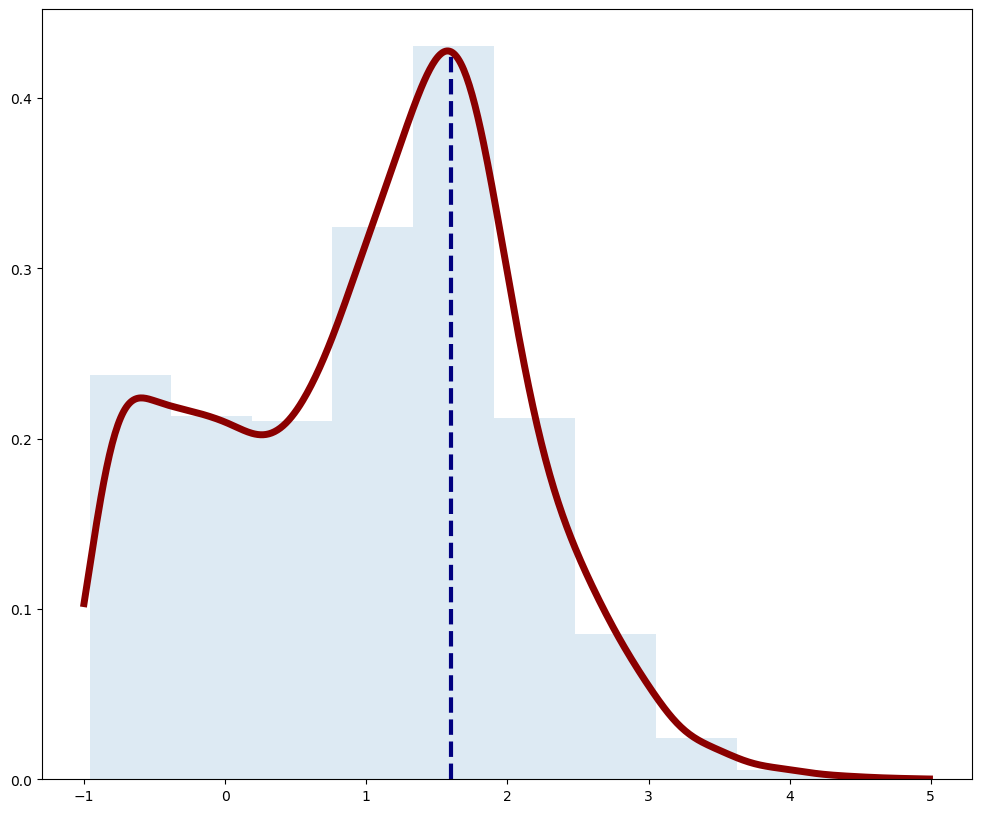

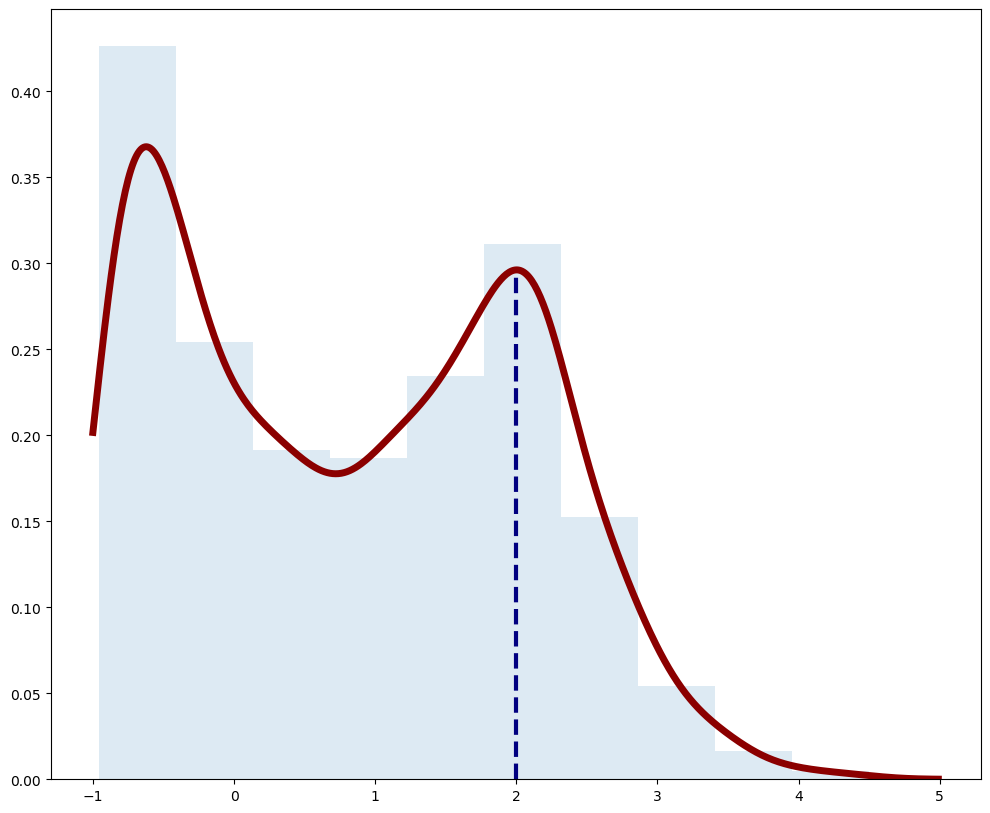

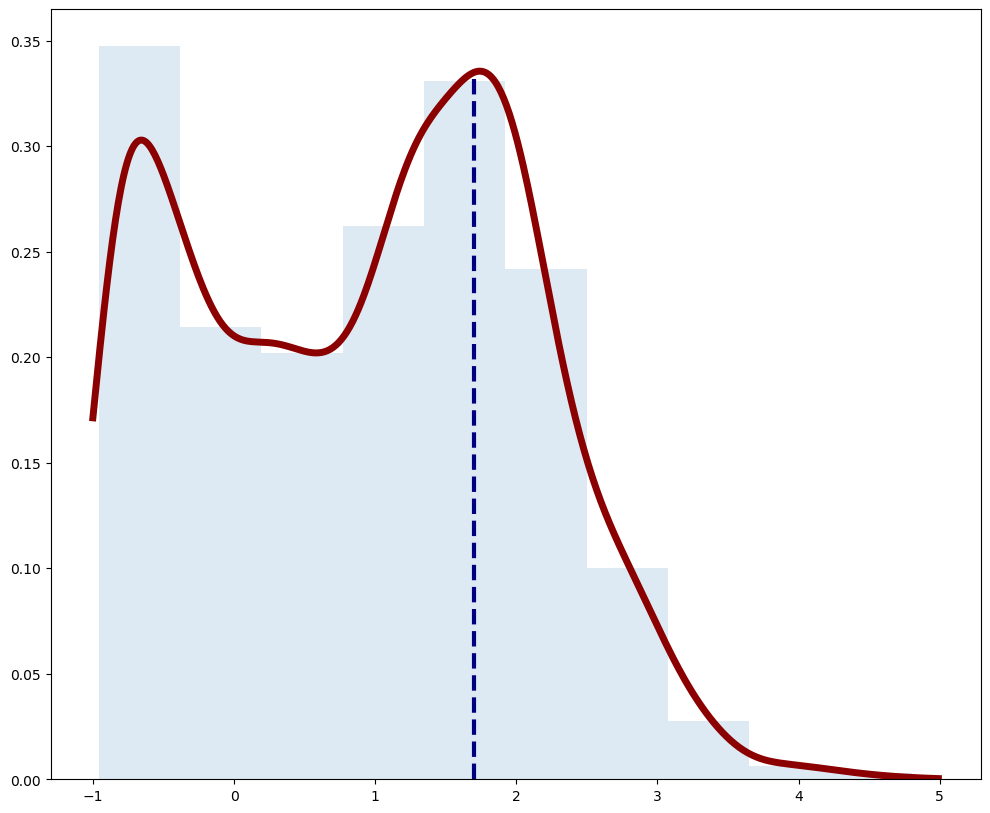

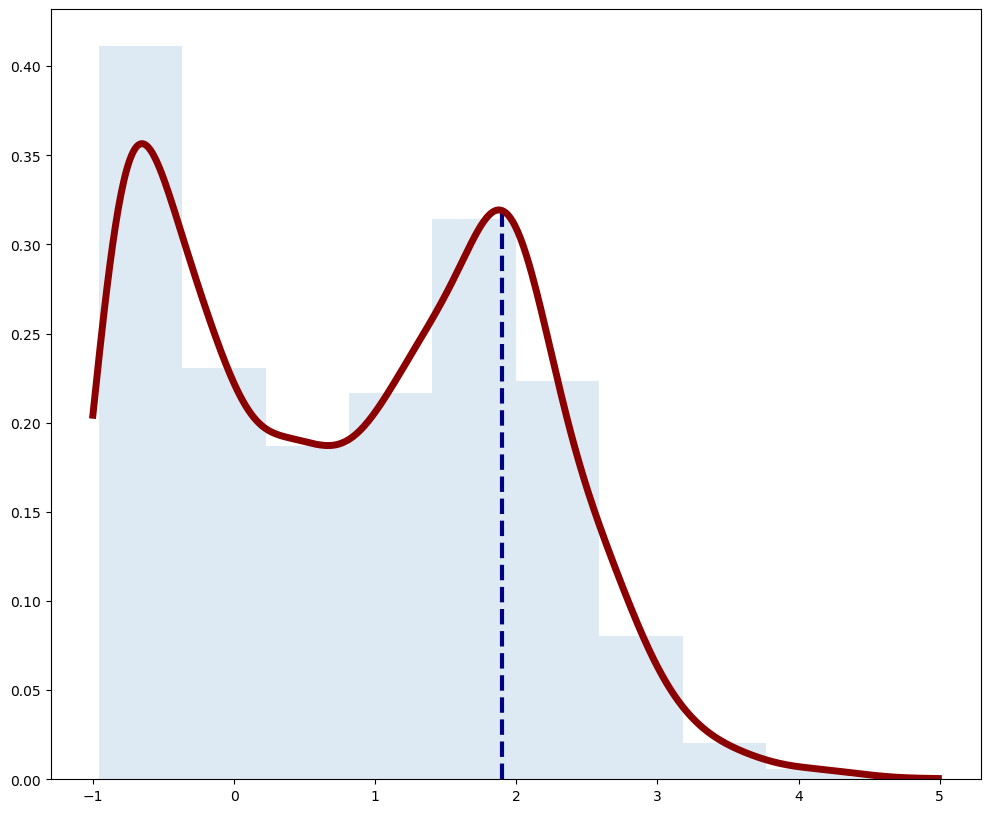

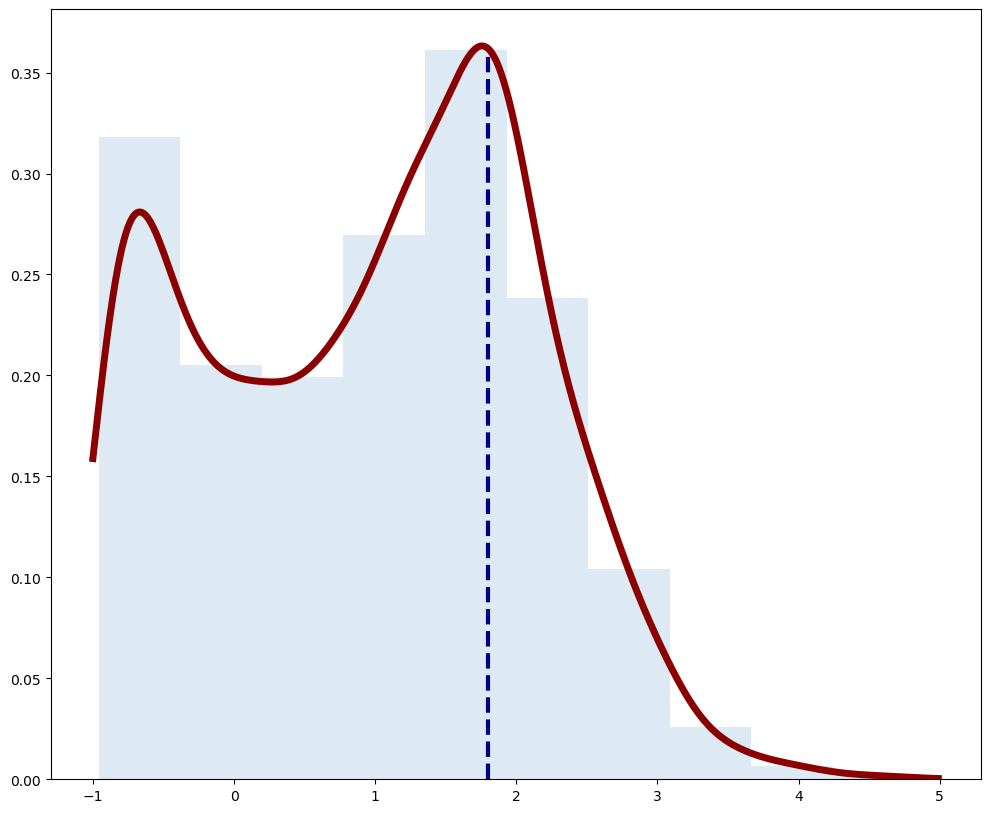

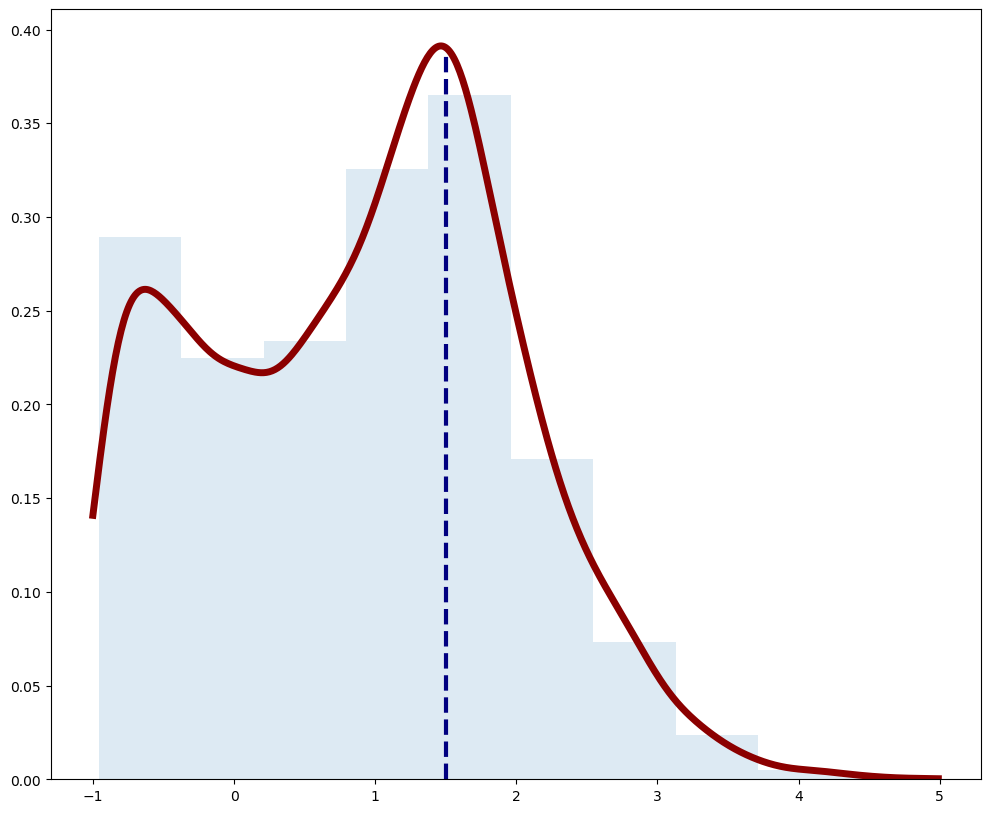

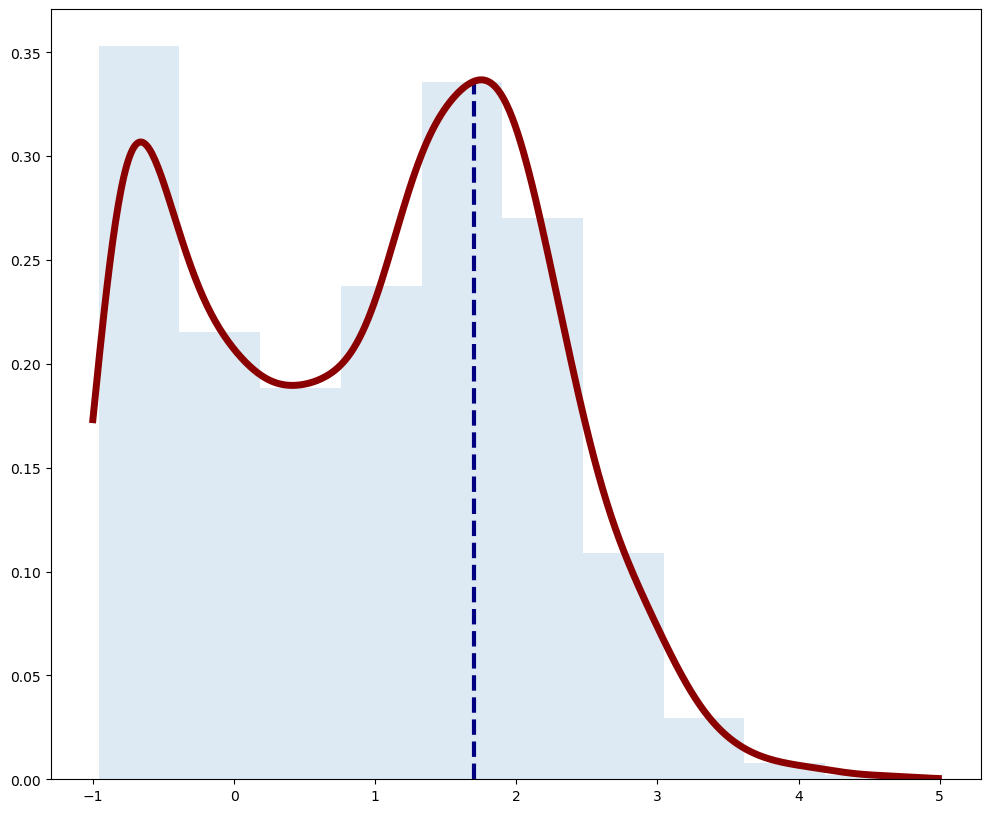

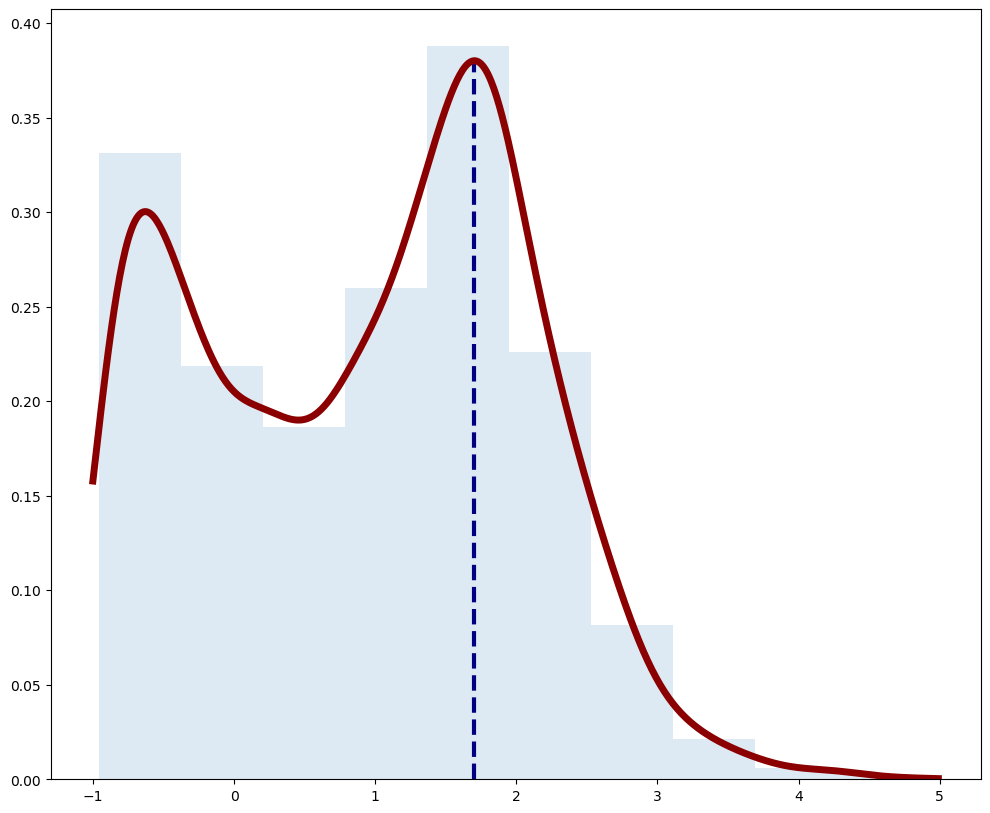

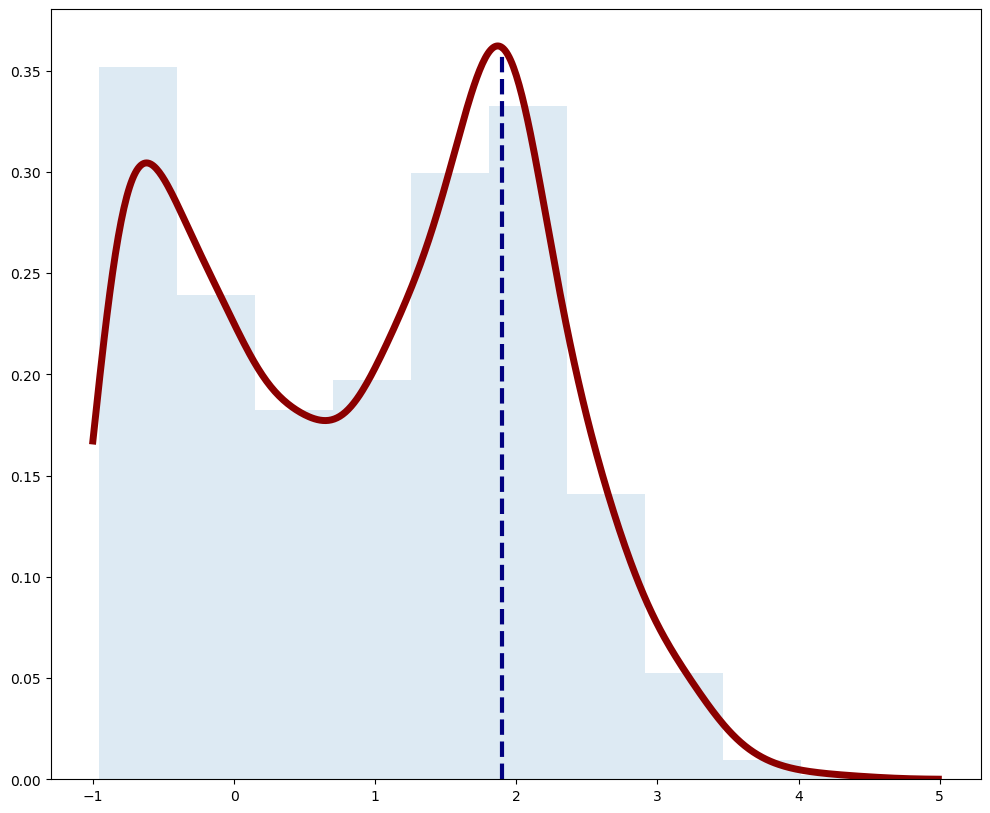

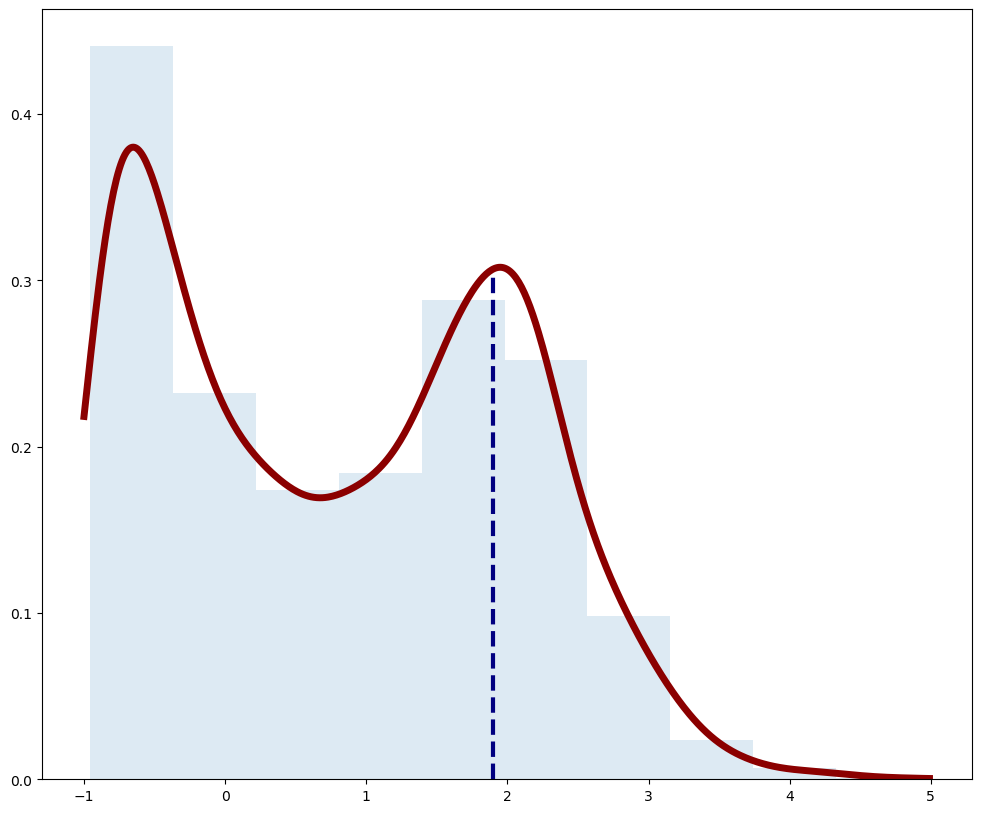

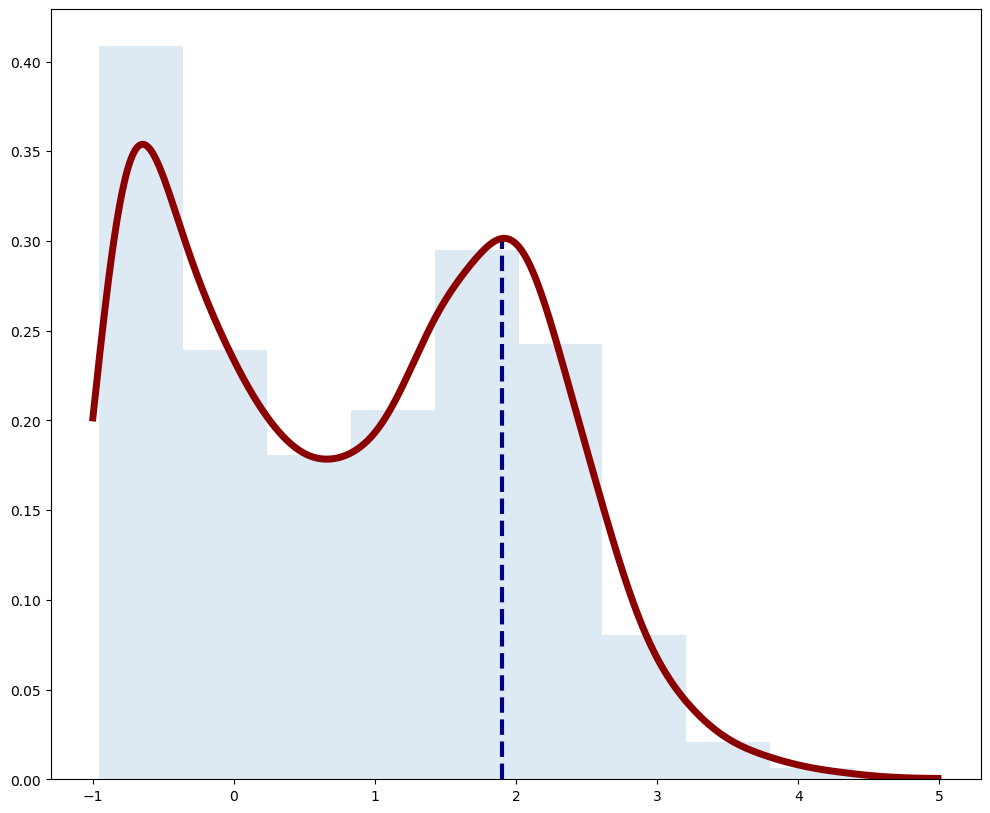

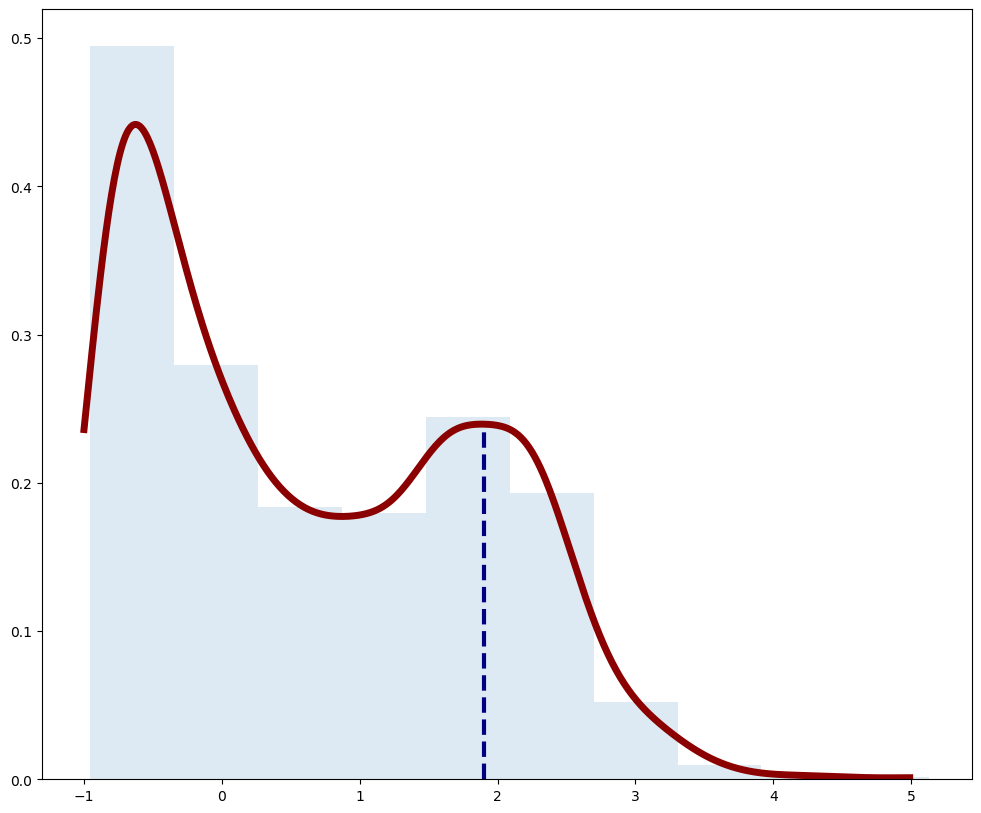

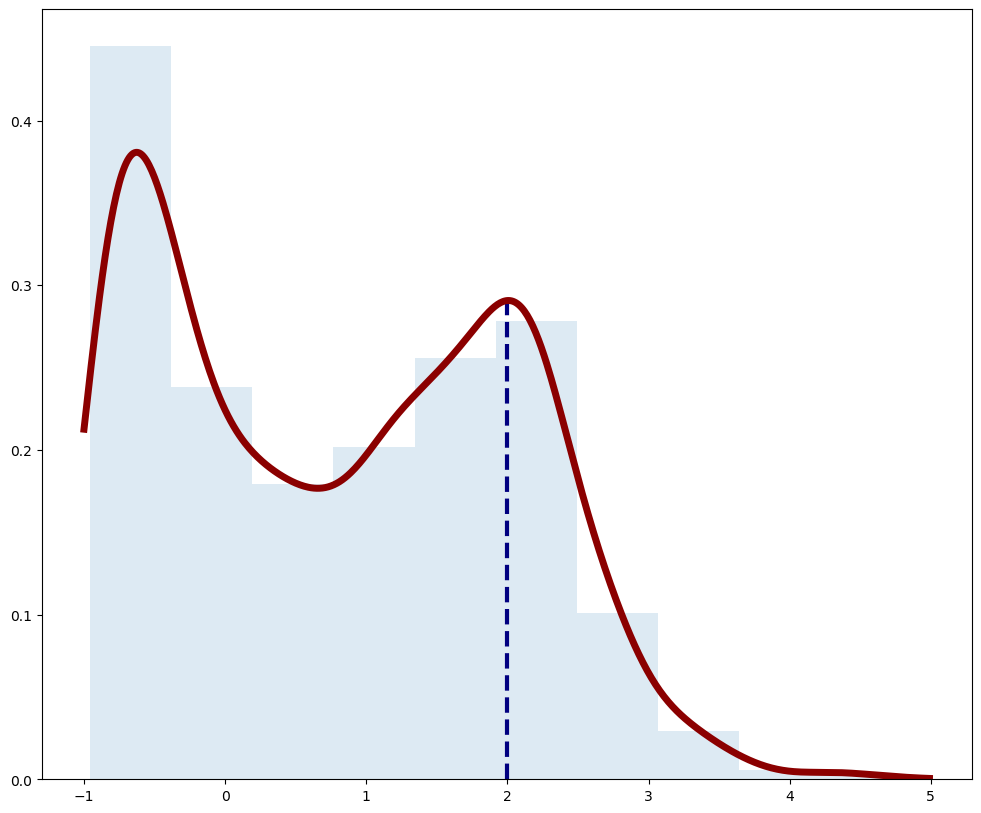

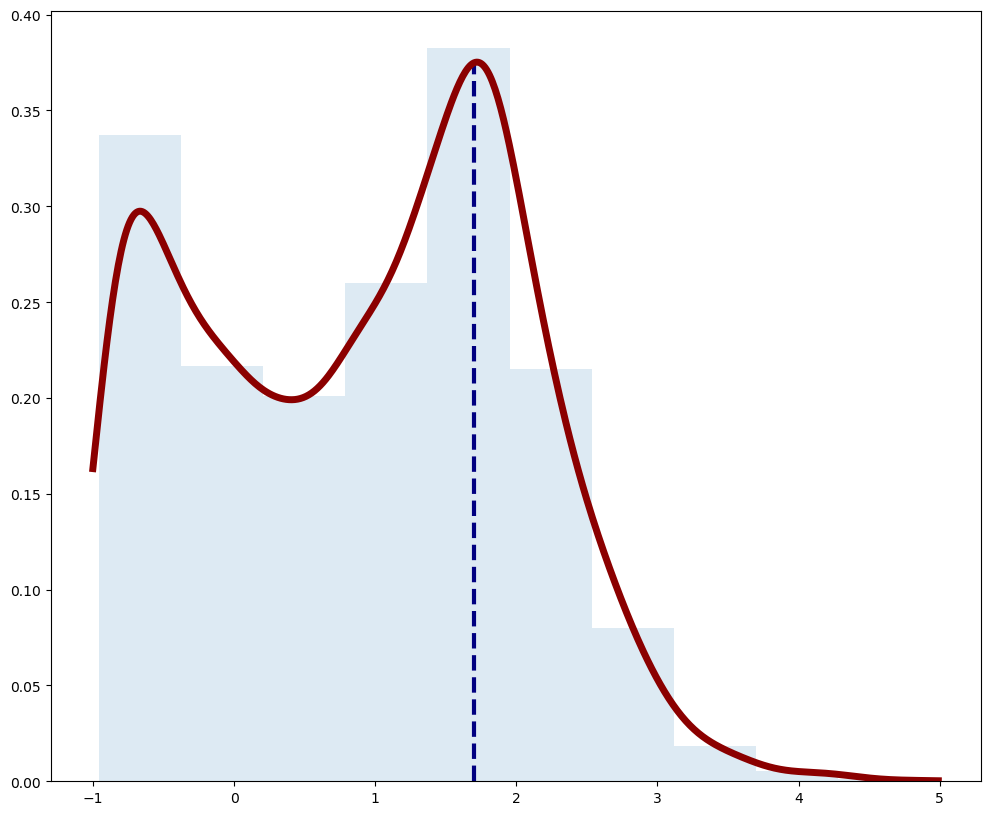

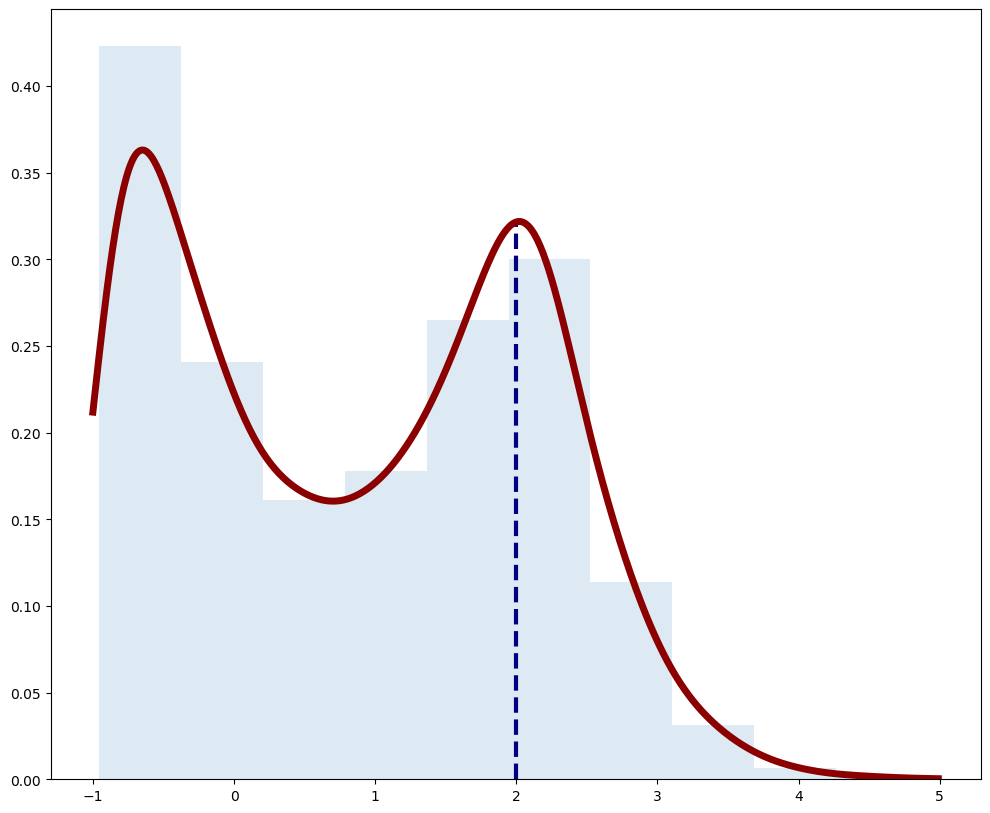

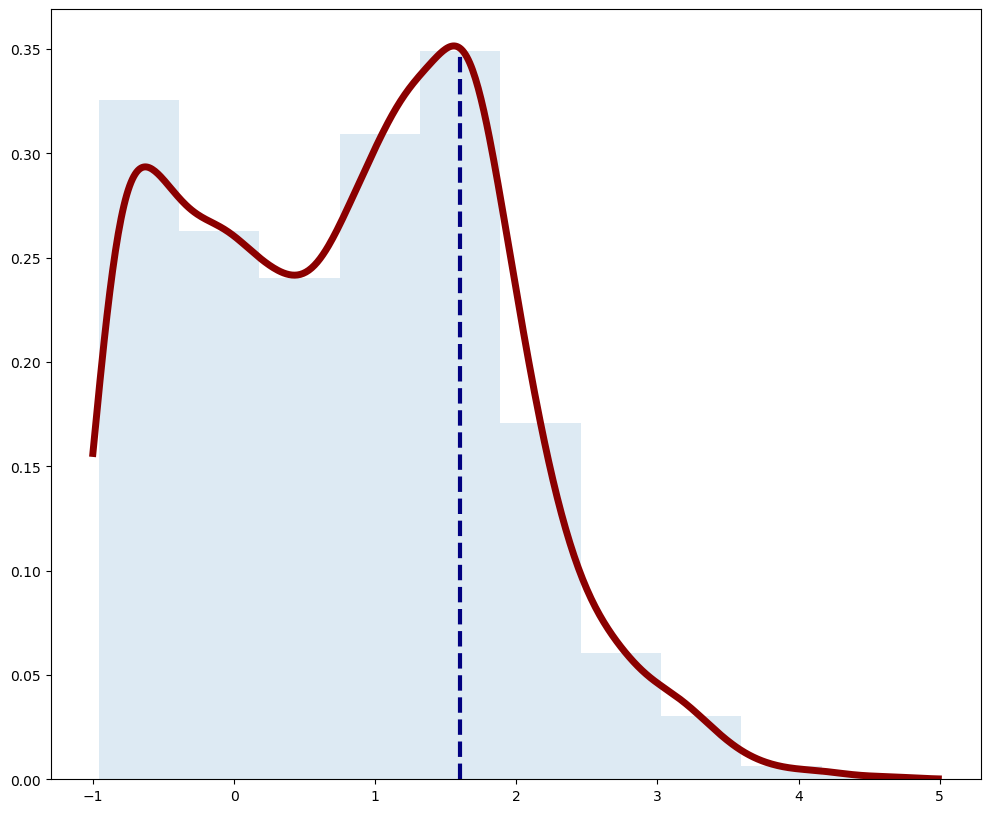

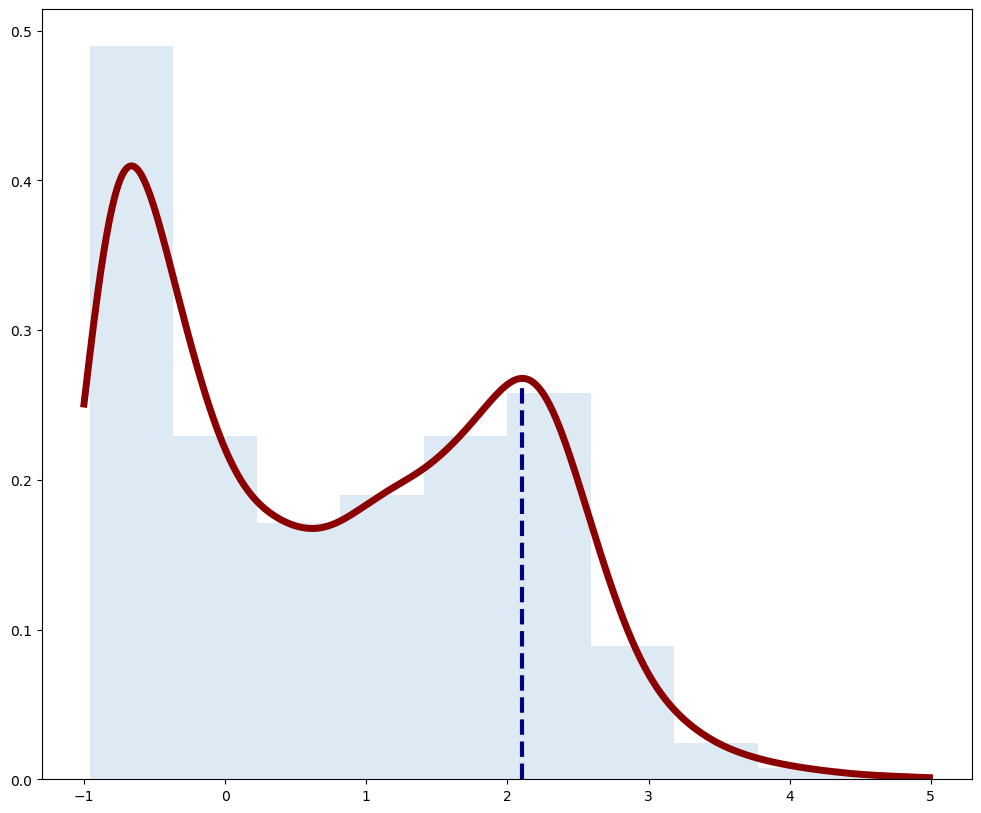

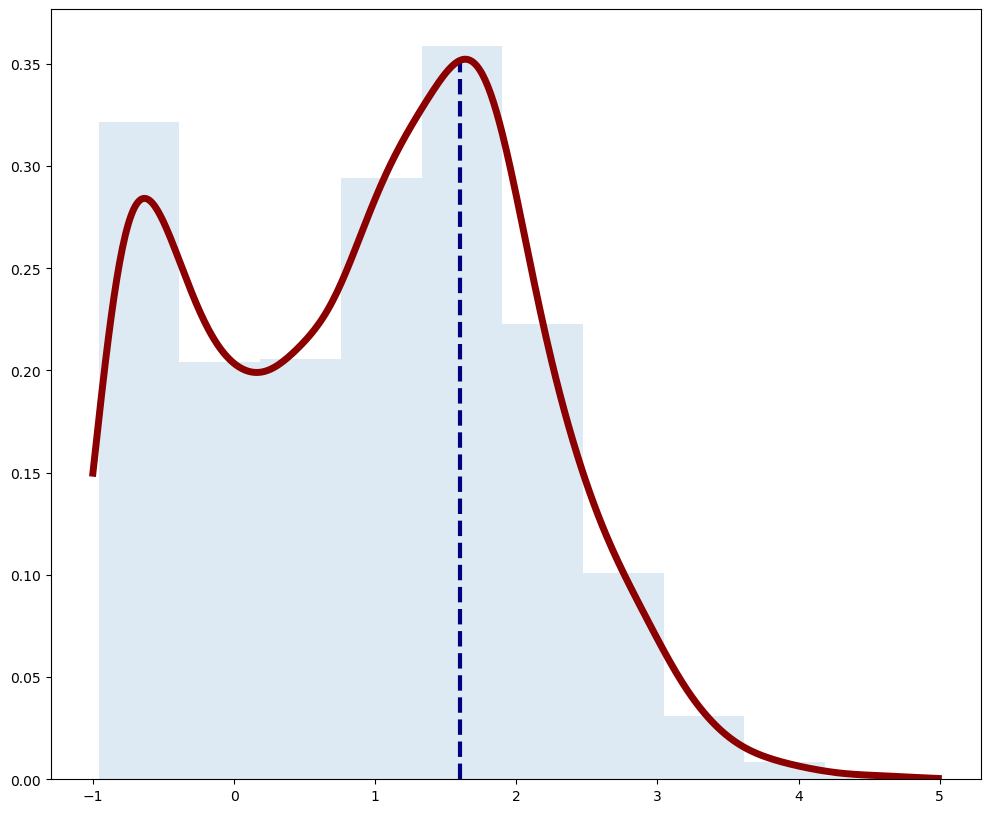

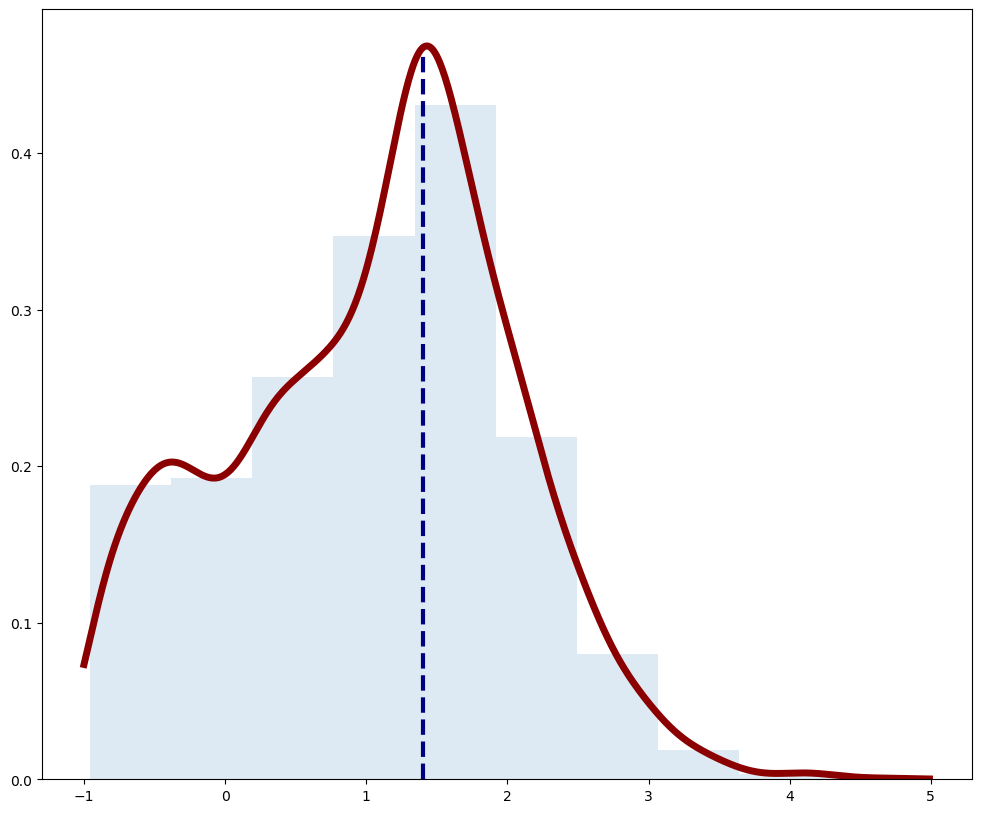

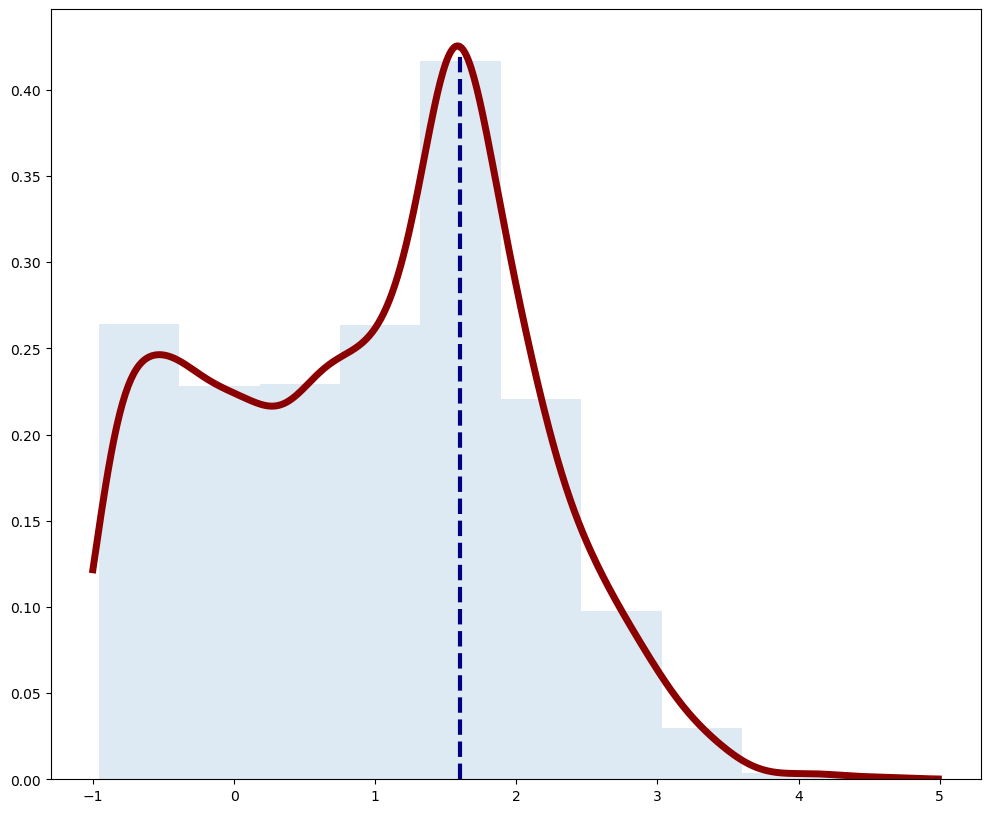

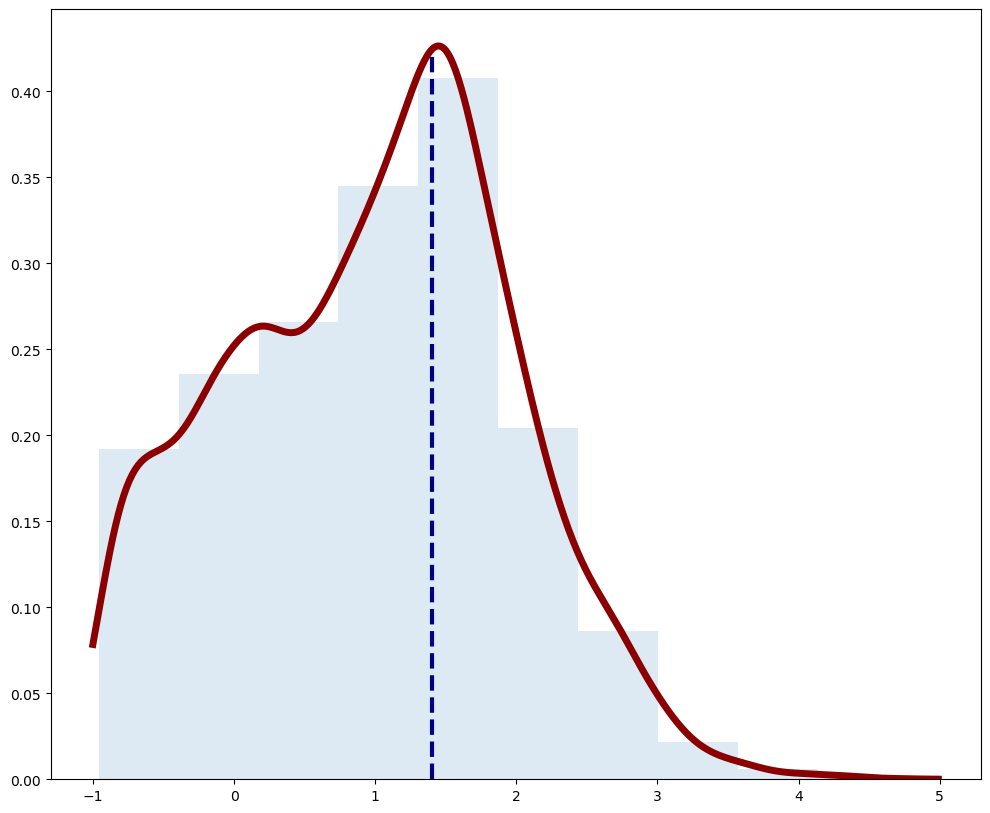

In [12]:
shalek_mrna_counts = spu.transform_tpm_to_counts(shalek_tpm_tab, plot_hist = True, correct_high = True, adjust_high=True)

In [13]:
song_mrna_counts = pd.read_csv('../../../data/song/song_mrna_counts.tab', sep='\t', index_col=0)
trapnell_mrna_counts = pd.read_csv('../../../data/trapnell/trapnell_mrna_counts.tab', sep='\t', index_col=0)
das_mrna_counts = pd.read_csv('../../../data/das/das_mrna_counts.tab', sep='\t', index_col=0)
lescroart_mrna_counts = pd.read_csv('../../../data/lescroart/lescroart_mrna_counts.tab', sep='\t', index_col=0)

In [14]:
# SRA tables contain information on the average spot length for each dataset

song_srat = pd.read_csv('../../../data/song/SraRunTable.txt', sep='\t')
song_srat = song_srat.set_index('Run_s')#.columns
chen_srat = pd.read_csv('../../../data/chen/SraRunTable.txt', sep='\t')
chen_srat = chen_srat.set_index('Run_s')#.columns
trapnell_srat = pd.read_csv('../../../data/trapnell/SraRunTable.txt', sep='\t')
trapnell_srat = trapnell_srat.set_index('Run')#.columns
lescroart_srat = pd.read_csv('../../../data/lescroart/SraRunTable.txt', sep='\t')
lescroart_srat = lescroart_srat.set_index('Run')#.columns
das_srat = pd.read_csv('../../../data/das/SraRunTable.txt', sep='\t')
das_srat = das_srat.set_index('Run')#.columns

song_common_genes = [gene for gene in song_rsem_tab.index if ((gene in song_mrna_counts.index) & (gene in song_el.index))]
song_cells = song_mrna_counts.columns
song_counts_tab = song_rsem_tab.loc[song_common_genes, song_cells]
song_mrna_tab = song_mrna_counts.loc[song_common_genes, song_cells]
song_el_tab = song_el.loc[song_common_genes, song_cells]

trapnell_common_genes = [gene for gene in trapnell_rsem_tab.index if ((gene in trapnell_mrna_counts.index) & (gene in trapnell_el.index))]
trapnell_cells = trapnell_mrna_counts.columns
trapnell_counts_tab = trapnell_rsem_tab.loc[trapnell_common_genes, trapnell_cells]
trapnell_mrna_tab = trapnell_mrna_counts.loc[trapnell_common_genes, trapnell_cells]
trapnell_el_tab = trapnell_el.loc[trapnell_common_genes, trapnell_cells]

lescroart_common_genes = [gene for gene in lescroart_rsem_tab.index if ((gene in lescroart_mrna_counts.index) & (gene in lescroart_el.index))]
lescroart_cells = lescroart_mrna_counts.columns
lescroart_counts_tab = lescroart_rsem_tab.loc[lescroart_common_genes, lescroart_cells]
lescroart_mrna_tab = lescroart_mrna_counts.loc[lescroart_common_genes, lescroart_cells]
lescroart_el_tab = lescroart_el.loc[lescroart_common_genes, lescroart_cells]

das_common_genes = [gene for gene in das_rsem_tab.index if ((gene in das_mrna_counts.index) & (gene in das_el.index))]
das_cells = das_mrna_counts.columns
das_counts_tab = das_rsem_tab.loc[das_common_genes, das_cells]
das_mrna_tab = das_mrna_counts.loc[das_common_genes, das_cells]
das_el_tab = das_el.loc[das_common_genes, das_cells]

chen_common_genes = [gene for gene in chen_rsem_tab.index if ((gene in chen_mrna_counts.index) & (gene in chen_el.index))]
chen_cells = chen_mrna_counts.columns
chen_counts_tab = chen_rsem_tab.loc[chen_common_genes, chen_cells]
chen_mrna_tab = chen_mrna_counts.loc[chen_common_genes, chen_cells]
chen_el_tab = chen_el.loc[chen_common_genes, chen_cells]

In [15]:
song_len = song_srat.loc[song_cells, 'AvgSpotLen_l']
das_len = das_srat.loc[das_cells, 'AvgSpotLen']
chen_len = chen_srat.loc[chen_cells, 'AvgSpotLen_l']
trapnell_len = trapnell_srat.loc[trapnell_cells, 'AvgSpotLen']
lescroart_len = lescroart_srat.loc[lescroart_cells, 'AvgSpotLen']

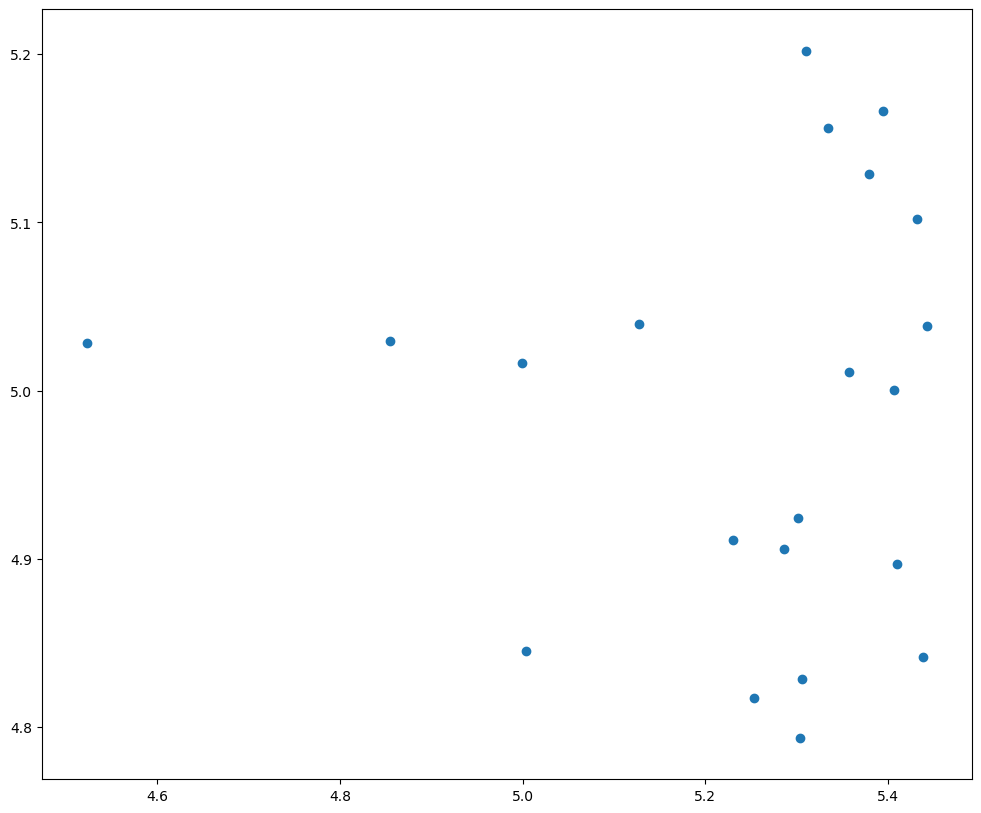

In [16]:
plt.scatter(np.log10(shalek_read_counts.sum()), np.log10(shalek_mrna_counts.sum()))
plt.show()

In [17]:
shalek_common_genes = [gene for gene in shalek_rsem_tab.index if ((gene in shalek_mrna_counts.index) & (gene in shalek_el.index))]
shalek_cells = shalek_mrna_counts.columns
shalek_counts_tab = shalek_rsem_tab.loc[shalek_common_genes, shalek_cells]
shalek_mrna_tab = shalek_mrna_counts.loc[shalek_common_genes, shalek_cells]
shalek_el_tab = shalek_el.loc[shalek_common_genes, shalek_cells]

In [18]:
song_c = ((song_counts_tab*(song_mrna_tab > 0)*song_len).sum()/(song_mrna_tab*song_el_tab).sum())
lescroart_c = ((lescroart_counts_tab*(lescroart_mrna_tab > 0)*lescroart_len).sum()/(lescroart_mrna_tab*lescroart_el_tab).sum())
trapnell_c = ((trapnell_counts_tab*(trapnell_mrna_tab > 0)*trapnell_len).sum()/(trapnell_mrna_tab*trapnell_el_tab).sum())
das_c = ((das_counts_tab*(das_mrna_tab > 0)*das_len).sum()/(das_mrna_tab*das_el_tab).sum())
chen_c = ((chen_counts_tab*(chen_mrna_tab > 0)*chen_len).sum()/(chen_mrna_tab*chen_el_tab).sum())

shalek_counts_tab.columns = [x.split('_')[0] for x in shalek_counts_tab]
shalek_mrna_tab.columns = [x.split('_')[0] for x in shalek_mrna_tab]
shalek_el_tab.columns = [x.split('_')[0] for x in shalek_el_tab]

shalek_c = ((shalek_counts_tab*(shalek_mrna_tab > 0)*202).sum()/(shalek_mrna_tab*shalek_el_tab).sum())

In [19]:
shalek_read_counts.columns = [x.split('_')[0] for x in shalek_read_counts]

In [20]:
mrna_per_event_chen = chen_mrna_counts.loc[[x.split('_')[0] for x in chen_PSI.index if (x.split('_')[0] in chen_mrna_counts.index)]]
mrna_per_event_chen.index = [x for x in chen_PSI.index if (x.split('_')[0] in chen_mrna_counts.index)]

mrna_per_event_song = song_mrna_counts.loc[[x.split('_')[0] for x in song_PSI.index if (x.split('_')[0] in song_mrna_counts.index)]][song_cells]
mrna_per_event_song.index = [x for x in song_PSI.index if (x.split('_')[0] in song_mrna_counts.index)]

trapnell_SR = trapnell_c[trapnell_cells]
mrna_per_event_trapnell = trapnell_mrna_counts.loc[[x.split('_')[0] for x in trapnell_PSI.index if (x.split('_')[0] in trapnell_mrna_counts.index)]][trapnell_cells]
mrna_per_event_trapnell.index = [x for x in trapnell_PSI.index if (x.split('_')[0] in trapnell_mrna_counts.index)]

lescroart_SR = lescroart_c[lescroart_cells]
mrna_per_event_lescroart = lescroart_mrna_counts.loc[[x.split('_')[0] for x in lescroart_PSI.index if (x.split('_')[0] in lescroart_mrna_counts.index)]][lescroart_cells]
mrna_per_event_lescroart.index = [x for x in lescroart_PSI.index if (x.split('_')[0] in lescroart_mrna_counts.index)]

das_SR = das_c[das_cells]
mrna_per_event_das = das_mrna_counts.loc[[x.split('_')[0] for x in das_PSI.index if (x.split('_')[0] in das_mrna_counts.index)]]
mrna_per_event_das.index = [x for x in das_PSI.index if (x.split('_')[0] in das_mrna_counts.index)]


shalek_SR = shalek_c
mrna_per_event_shalek = shalek_mrna_counts.loc[[x.split('_')[0] for x in shalek_PSI.index if (x.split('_')[0] in shalek_mrna_counts.index)]]
mrna_per_event_shalek.index = [x for x in shalek_PSI.index if (x.split('_')[0] in shalek_mrna_counts.index)]
mrna_per_event_shalek.columns = [x.split('_')[0] for x in mrna_per_event_shalek.columns]

In [21]:
chen_int_genes, chen_int_exons = spu.get_int_events(chen_PSI, chen_mrna_counts, 0.05)
chen_int_exons = [x for x in chen_int_exons if x in mrna_per_event_chen.index]

song_int_genes, song_int_exons = spu.get_int_events(song_PSI, song_mrna_counts, 0.05)
song_int_exons = [x for x in song_int_exons if x in mrna_per_event_song.index]

trapnell_int_genes, trapnell_int_exons = spu.get_int_events(trapnell_PSI, trapnell_mrna_counts, 0.05)
trapnell_int_exons = [x for x in trapnell_int_exons if x in mrna_per_event_trapnell.index]

lescroart_int_genes, lescroart_int_exons = spu.get_int_events(lescroart_PSI, lescroart_mrna_counts, 0.05)
lescroart_int_exons = [x for x in lescroart_int_exons if x in mrna_per_event_lescroart.index]

das_int_genes, das_int_exons = spu.get_int_events(das_PSI, das_mrna_counts, 0.05)
das_int_exons = [x for x in das_int_exons if x in mrna_per_event_das.index]

shalek_int_genes, shalek_int_exons = spu.get_int_events(shalek_PSI, shalek_mrna_counts, 0.05)
shalek_int_exons = [x for x in shalek_int_exons if x in mrna_per_event_shalek.index]

In [22]:
reads_song, mrna_song, binary_song, psi_song = spu.get_dataset_averages(song_PSI, song_read_counts, 
                                                                        song_mrna_counts, song_int_exons)
reads_das, mrna_das, binary_das, psi_das = spu.get_dataset_averages(das_PSI, das_read_counts, 
                                                                     das_mrna_counts, das_int_exons)
reads_chen, mrna_chen, binary_chen, psi_chen = spu.get_dataset_averages(chen_PSI, chen_read_counts, 
                                                                        chen_mrna_counts, chen_int_exons)
reads_lescroart, mrna_lescroart, binary_lescroart, psi_lescroart = spu.get_dataset_averages(lescroart_PSI, 
                                                                                            lescroart_read_counts, 
                                                                                            lescroart_mrna_counts, 
                                                                                             lescroart_int_exons)
reads_trapnell, mrna_trapnell, binary_trapnell, psi_trapnell = spu.get_dataset_averages(trapnell_PSI, trapnell_read_counts, 
                                                                          trapnell_mrna_counts, trapnell_int_exons)

reads_shalek, mrna_shalek, binary_shalek, psi_shalek = spu.get_dataset_averages(shalek_PSI, shalek_read_counts, 
                                                                          shalek_mrna_counts, shalek_int_exons)

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return bound(*args, **kwds)


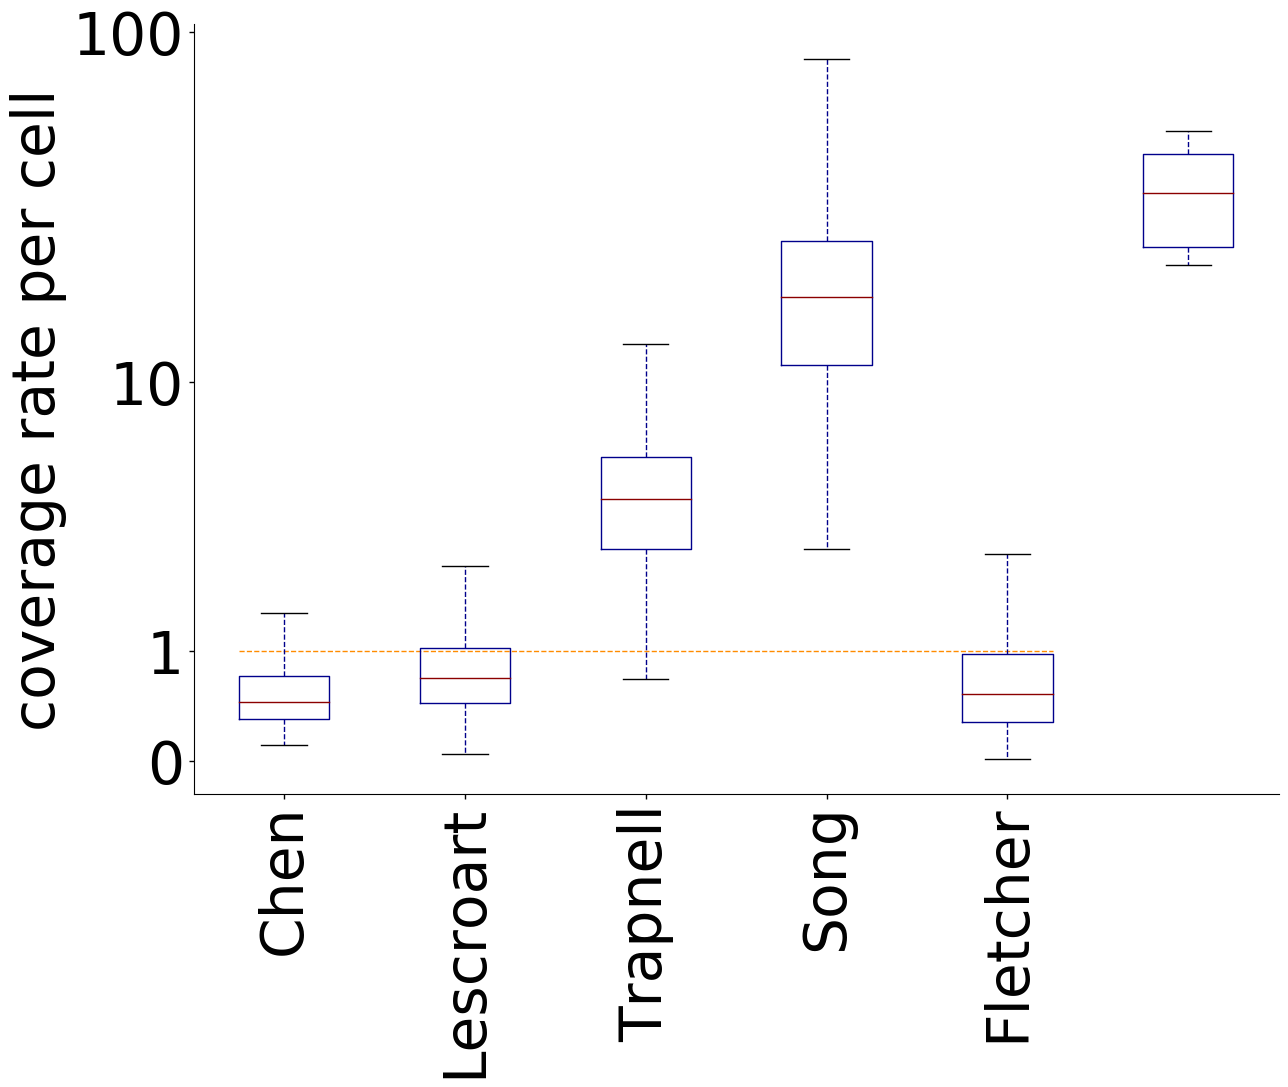

In [23]:
dset_names = ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Fletcher', 'Shalek']

scp.plot_boxplot([np.log10(chen_c+1),np.log10(lescroart_c+1), np.log10(trapnell_c+1), np.log10(song_c+1), np.log10(das_c+1),
                 np.log10(shalek_c+1)], 
                 'coverage rate per cell', dset_names, 
                 'Cj_per_cell_shalek', ylocs = [0, np.log10(2), np.log10(11), np.log10(101)],
                 ytags = ['0', '1', '10', '100'], plot_line = np.log10(2), save_dir='plots2/figure3/')

plt.show()

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return bound(*args, **kwds)


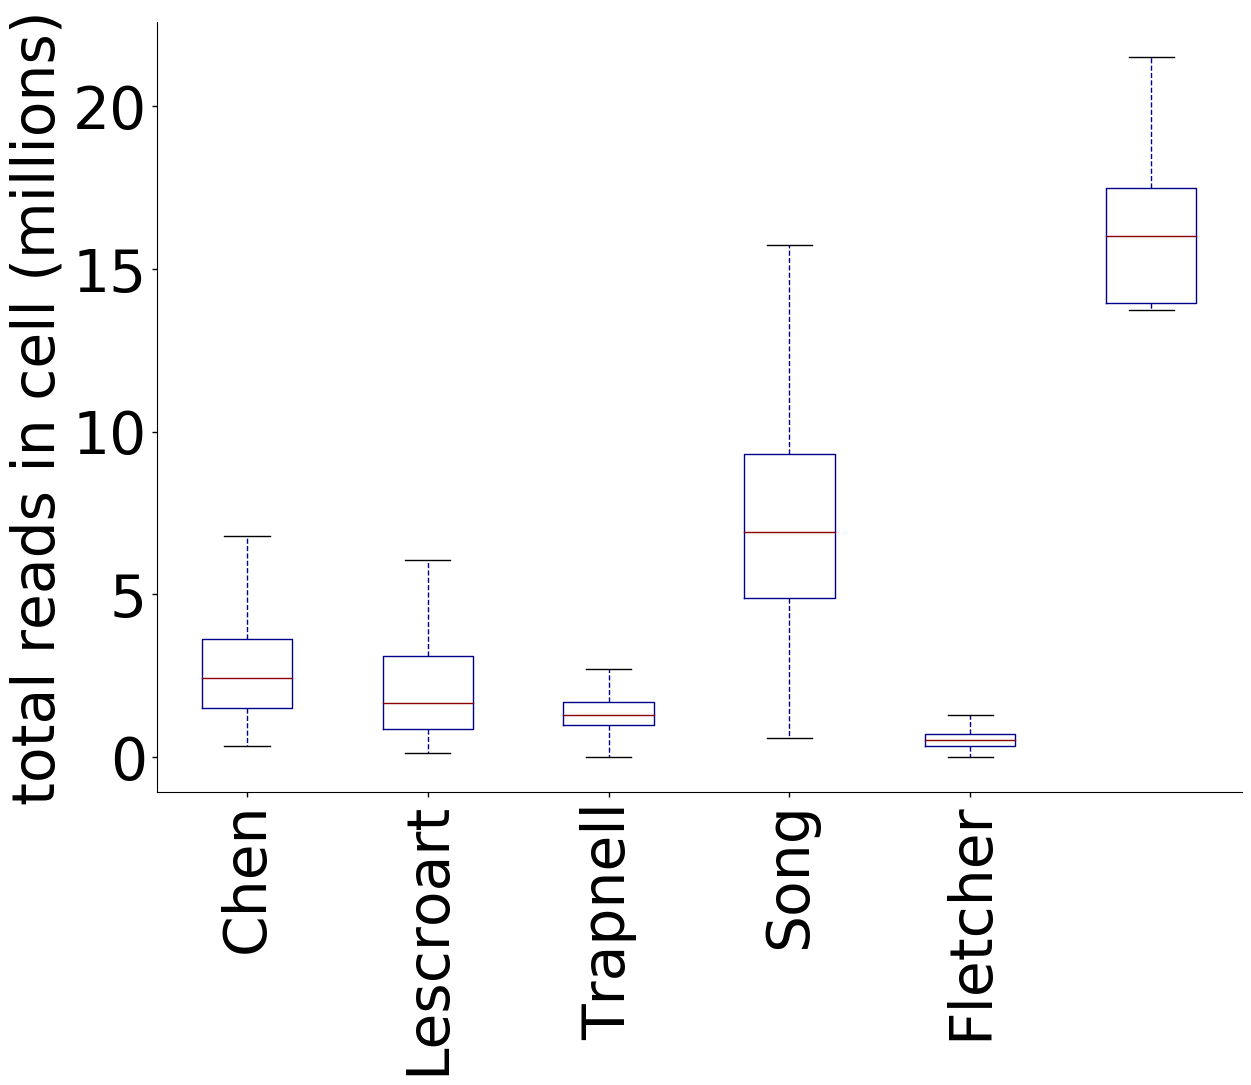

In [24]:
read_counts_chen = chen_rsem_tab.sum(axis=0)
read_counts_song = song_rsem_tab.sum(axis=0)
read_counts_trapnell = trapnell_rsem_tab.sum(axis=0)
read_counts_lescroart = lescroart_rsem_tab.sum(axis=0)
read_counts_das = das_rsem_tab.sum(axis=0)
read_counts_shalek = shalek_rsem_tab.sum(axis=0)

reads_df = [read_counts_chen, read_counts_lescroart, read_counts_trapnell, 
                      read_counts_song, read_counts_das, read_counts_shalek]


scp.plot_boxplot(reads_df, 'total reads in cell (millions)', dset_names, 'total_reads_boxplot_shalek', 
                 ylocs =[0, 5000000, 10000000, 15000000, 20000000], 
                 ytags = ['0', '5', '10', '15', '20'], save_dir='plots/figure3/')


plt.show()

In [25]:
def filter_psi(psi_tab, int_exons, mrna_tab, cj, reads_tab, mrna_min, reads_min=0, cell_min=0.5):
    
    int_exons = [x for x in int_exons if x in mrna_tab.index]
    print(len(int_exons))
    reads_tab = reads_tab.loc[int_exons, mrna_tab.columns]
    mrna_tab = mrna_tab.loc[int_exons, mrna_tab.columns]
    cj = cj.loc[mrna_tab.columns]
    psi_tab = psi_tab.loc[int_exons, mrna_tab.columns]

    cj_filter = (reads_tab.loc[int_exons, cj.index] >= (mrna_min*cj*(1+psi_tab.loc[int_exons, cj.index])))
    mrna_filter = (mrna_tab.loc[int_exons, cj.index] >= mrna_min) & (reads_tab.loc[int_exons, cj.index] >= reads_min) #&
    quality = ((mrna_filter & cj_filter).mean(axis=1) >= cell_min)
    good_exons = quality.loc[quality].index

    filter_tab = (mrna_filter & cj_filter).loc[good_exons]
    psi_tab_mrna = psi_tab.loc[good_exons]

    print(len(good_exons))

    PSI_filtered = psi_tab_mrna
    PSI_filtered = psi_tab_mrna.mask(~filter_tab)
    PSI_filtered = PSI_filtered.dropna(how='all') # might be unnecessary
    PSI_mrna_filtered = PSI_filtered.loc[PSI_filtered.isnull().mean(axis=1) < (1-cell_min)] # might be unnecessary
    total_exons = len(PSI_mrna_filtered.index)
    
    
    mrna_filtered = mrna_tab.loc[PSI_filtered.index].mask(~filter_tab)
    reads_filtered = reads_tab.loc[PSI_filtered.index].mask(~filter_tab)
    #PSI_mrna_z = get_zscore2(PSI_mrna_filtered)

    return PSI_filtered, PSI_mrna_filtered, good_exons, mrna_filtered, reads_filtered



In [26]:
shalek_int_genes, shalek_int_exons = spu.get_int_events(shalek_PSI, shalek_mrna_counts, 0.05)
shalek_int_exons = [x for x in shalek_int_exons if x in mrna_per_event_shalek.index]
shalek_PSI_filtered, shalek_PSI_mrna_filtered, shalek_good_exons, mrna_filtered, reads_filtered = filter_psi(shalek_PSI, 
                                            shalek_int_exons, mrna_per_event_shalek, shalek_c, shalek_read_counts, 10,
                                                                       cell_min=0.5)

good_cells = shalek_PSI_filtered.columns[shalek_PSI_filtered.isna().mean() <= 0.5]
shalek_PSI_good = shalek_PSI_filtered[good_cells]

391
20


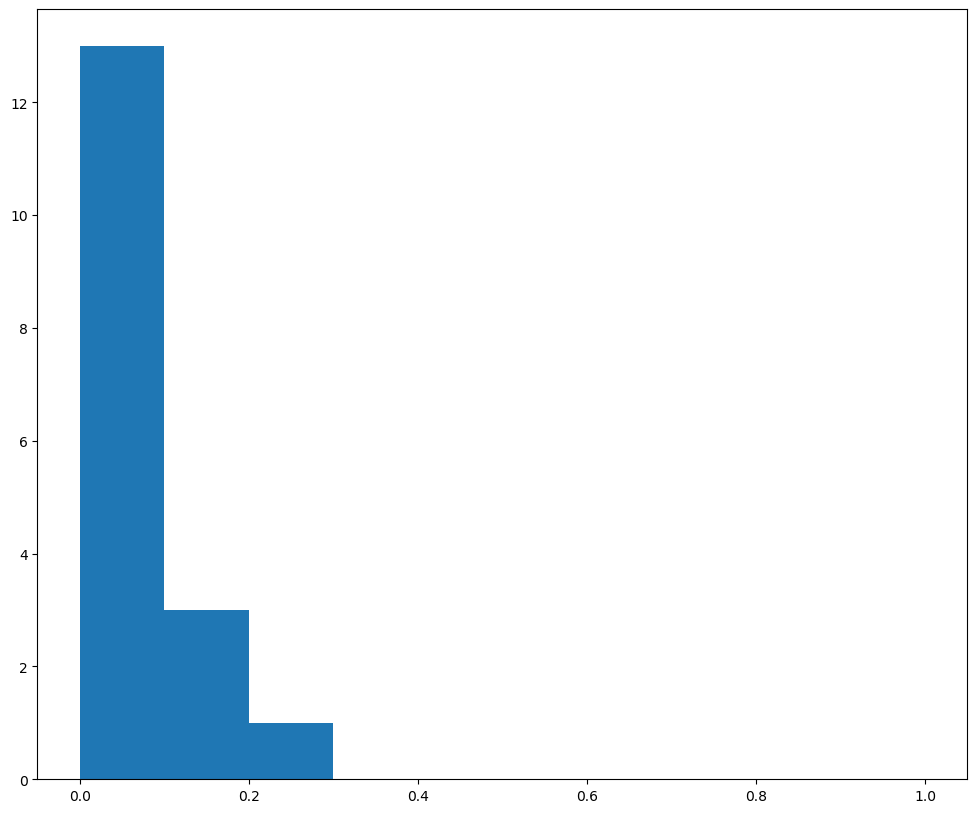

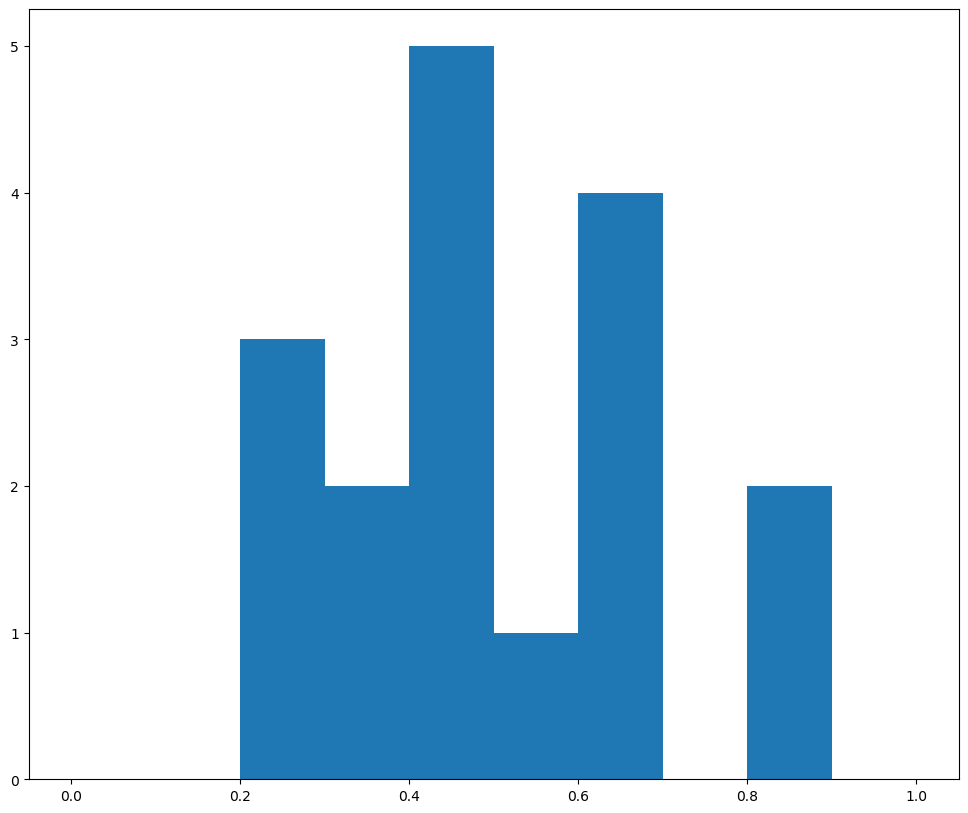

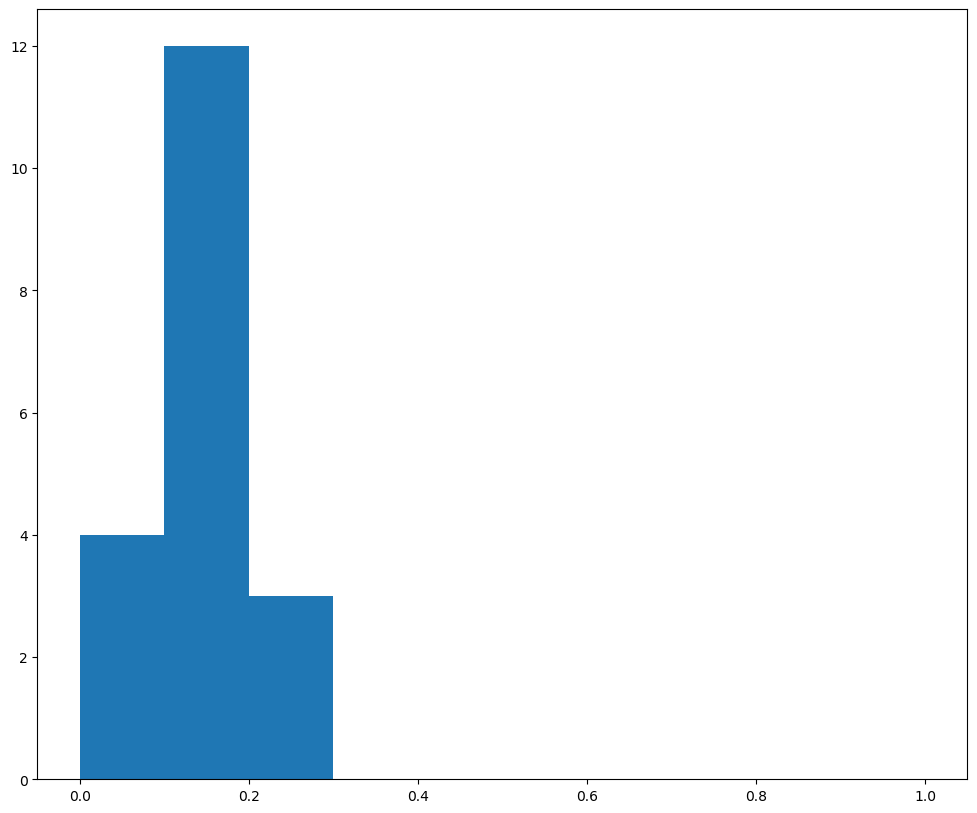

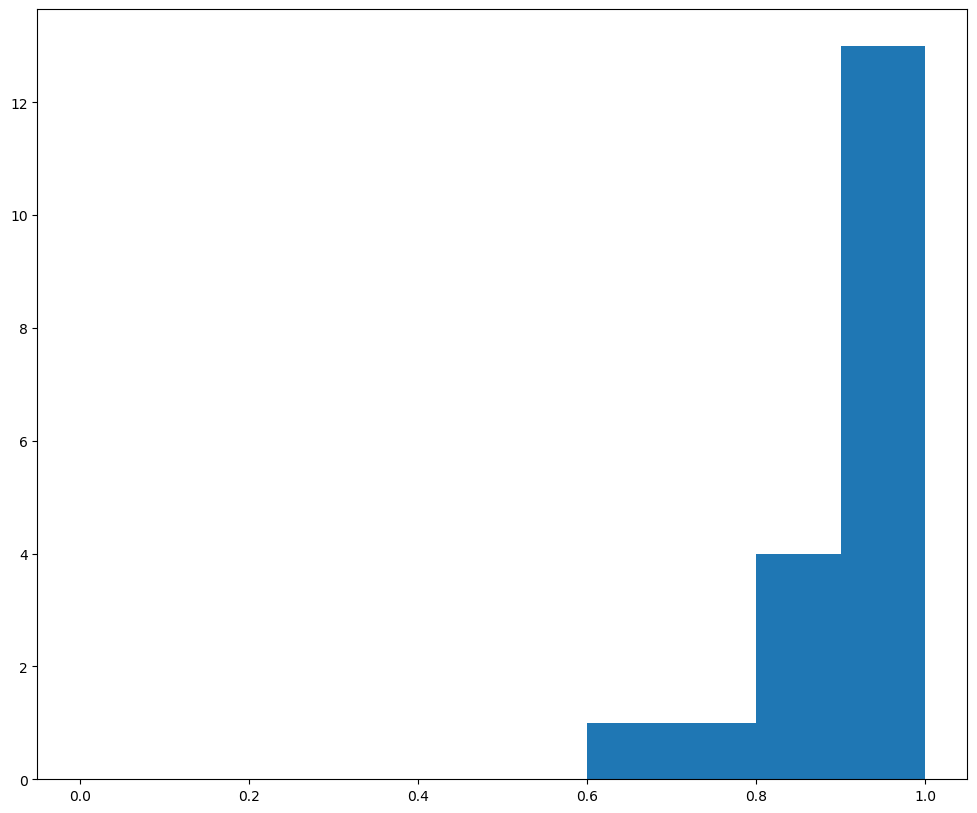

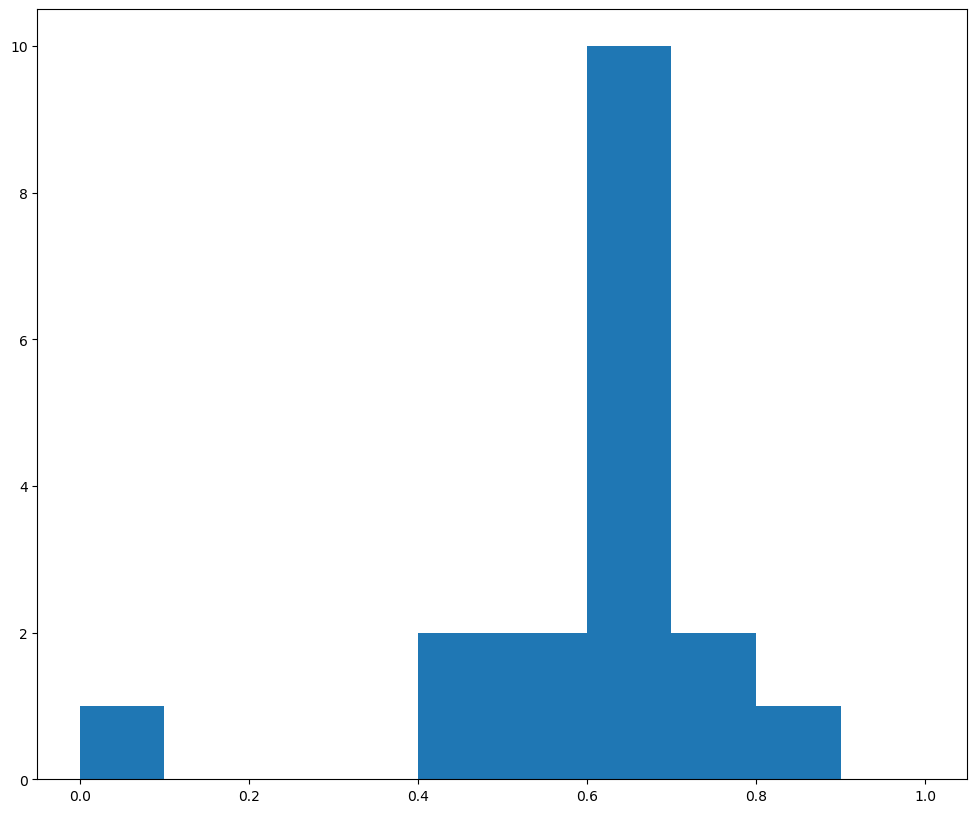

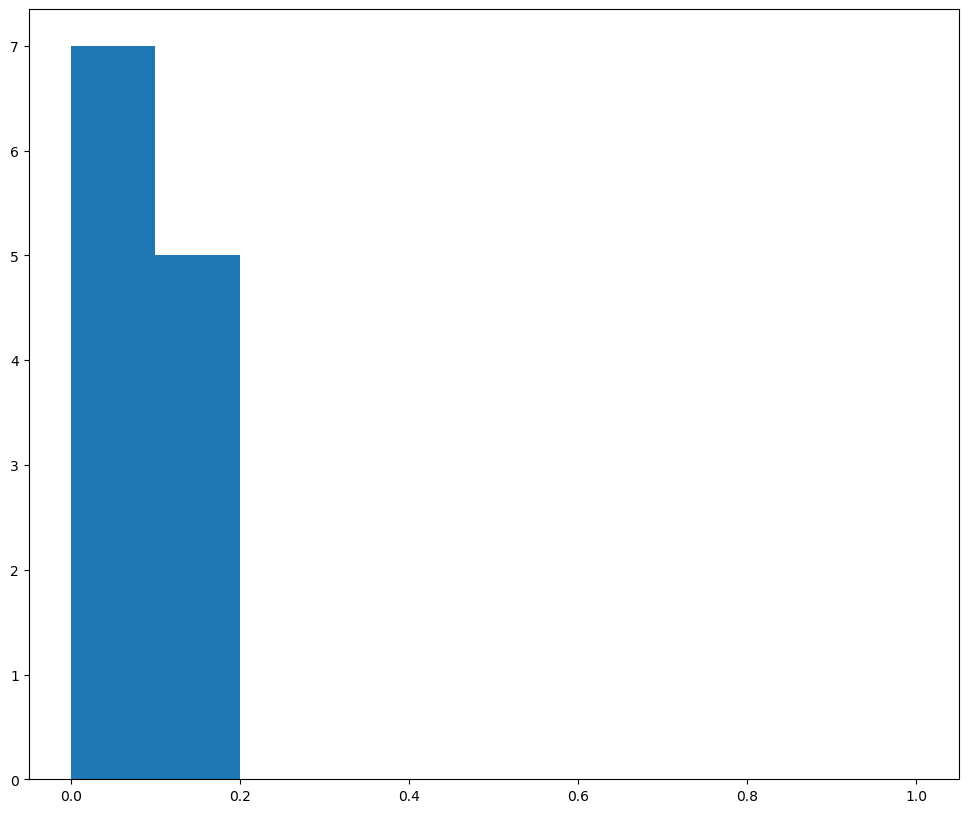

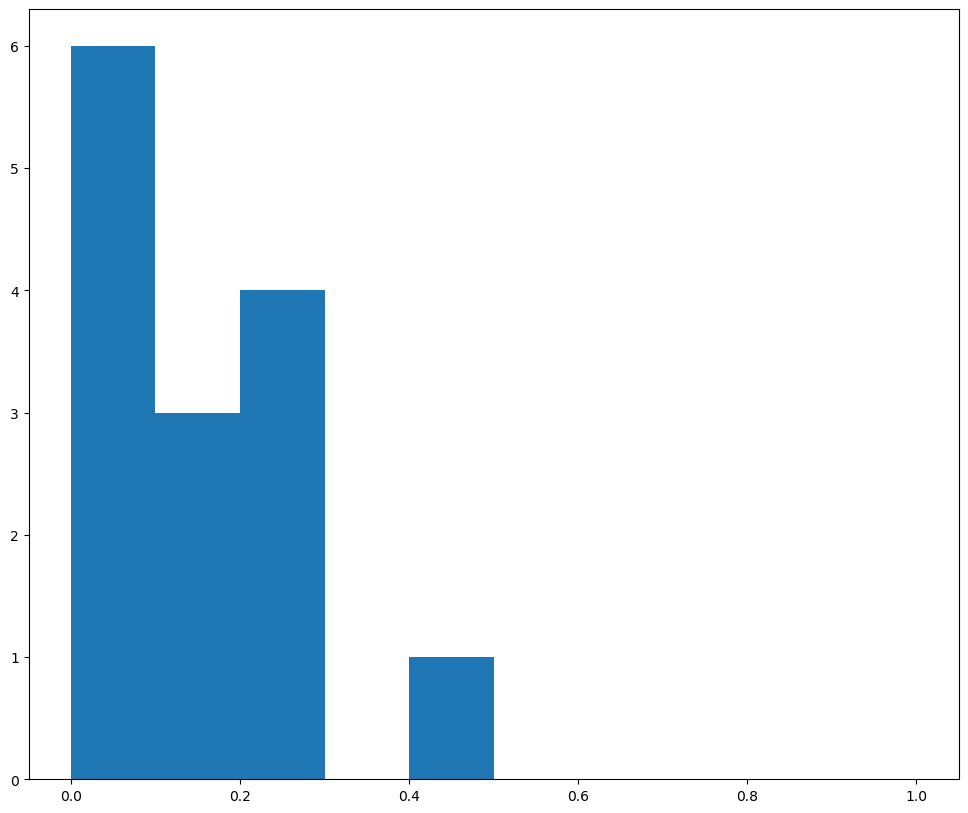

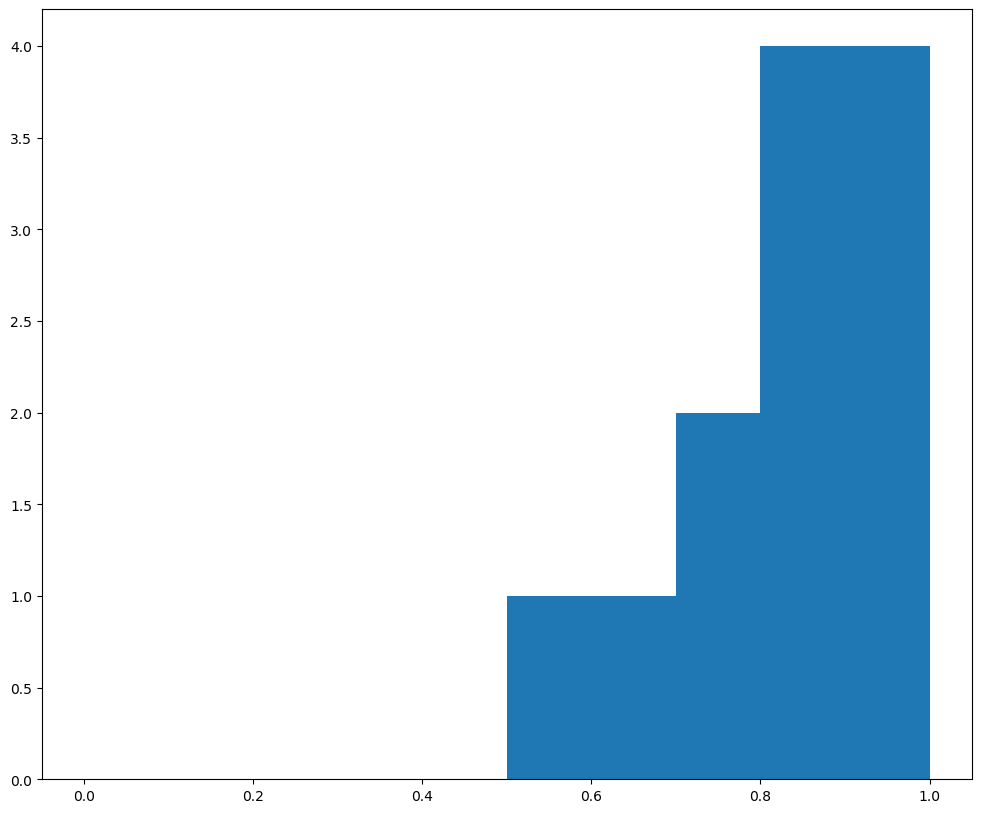

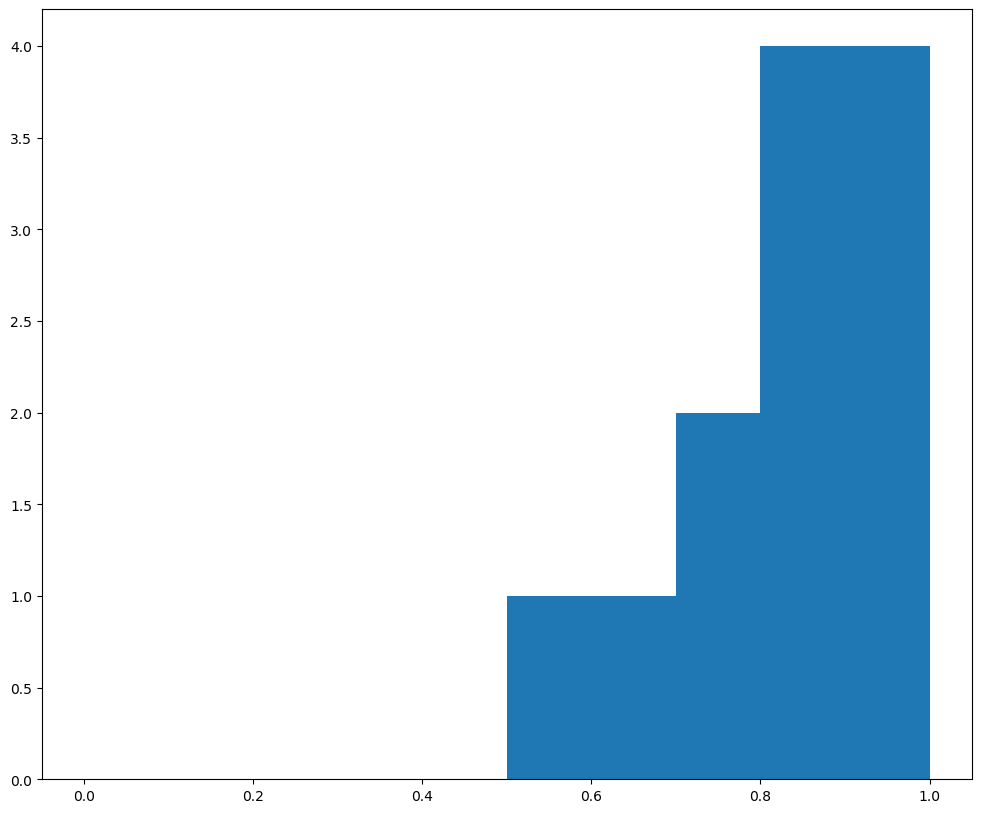

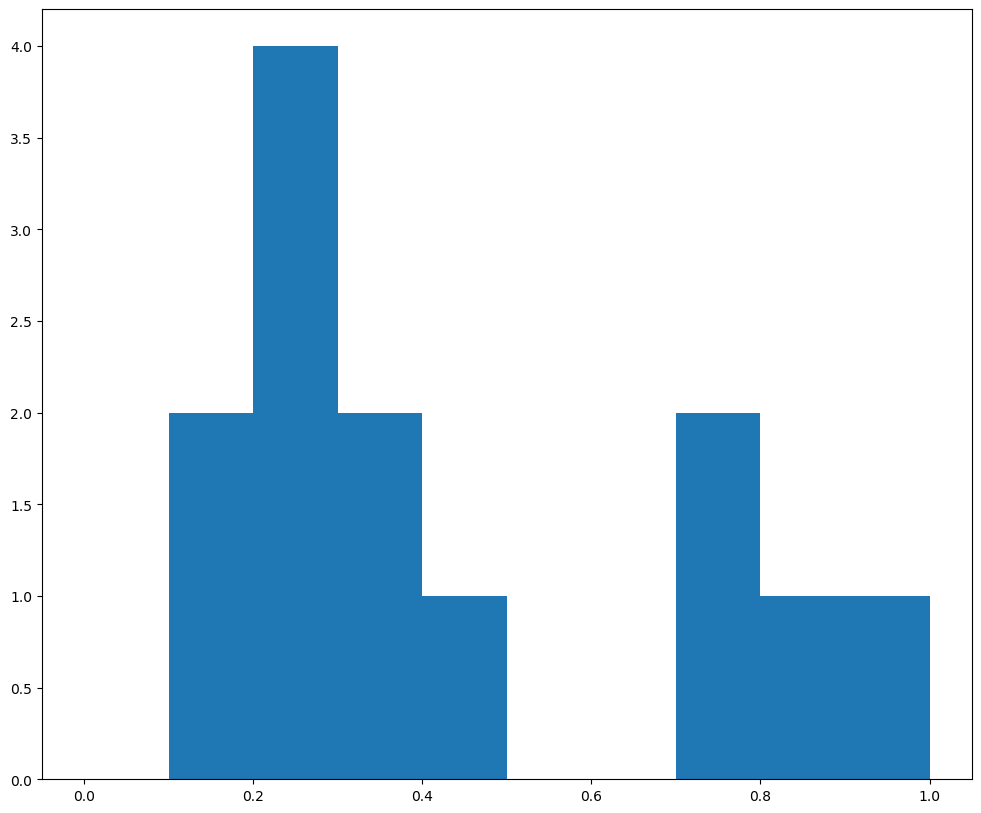

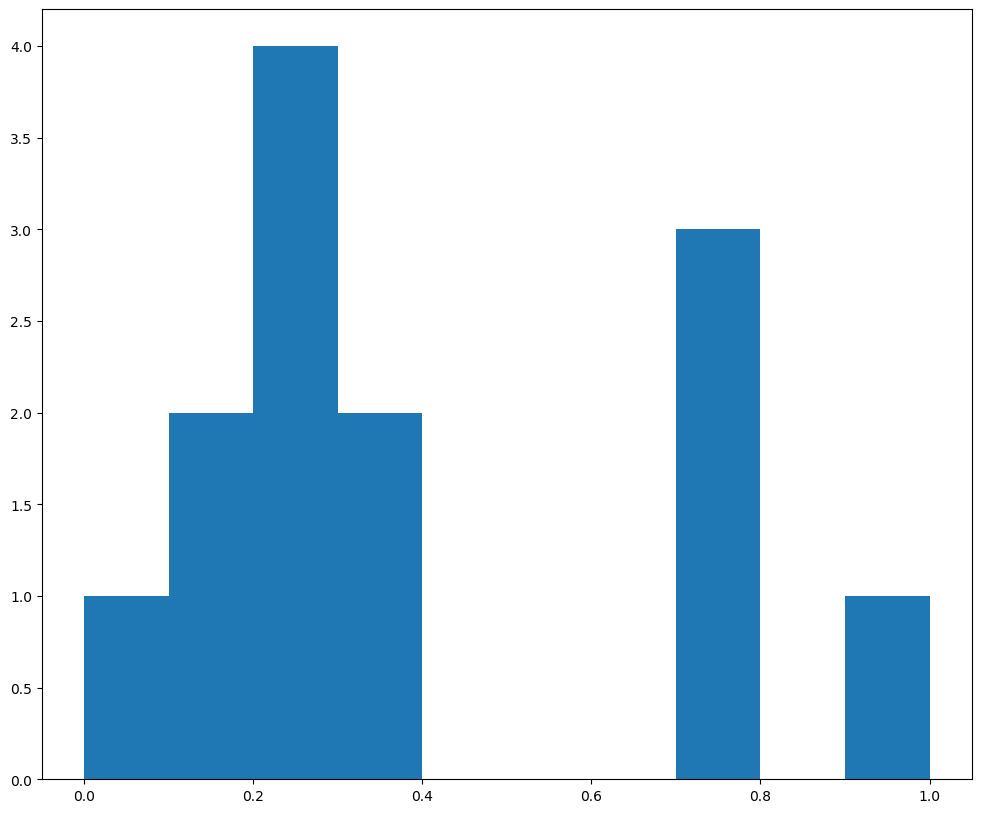

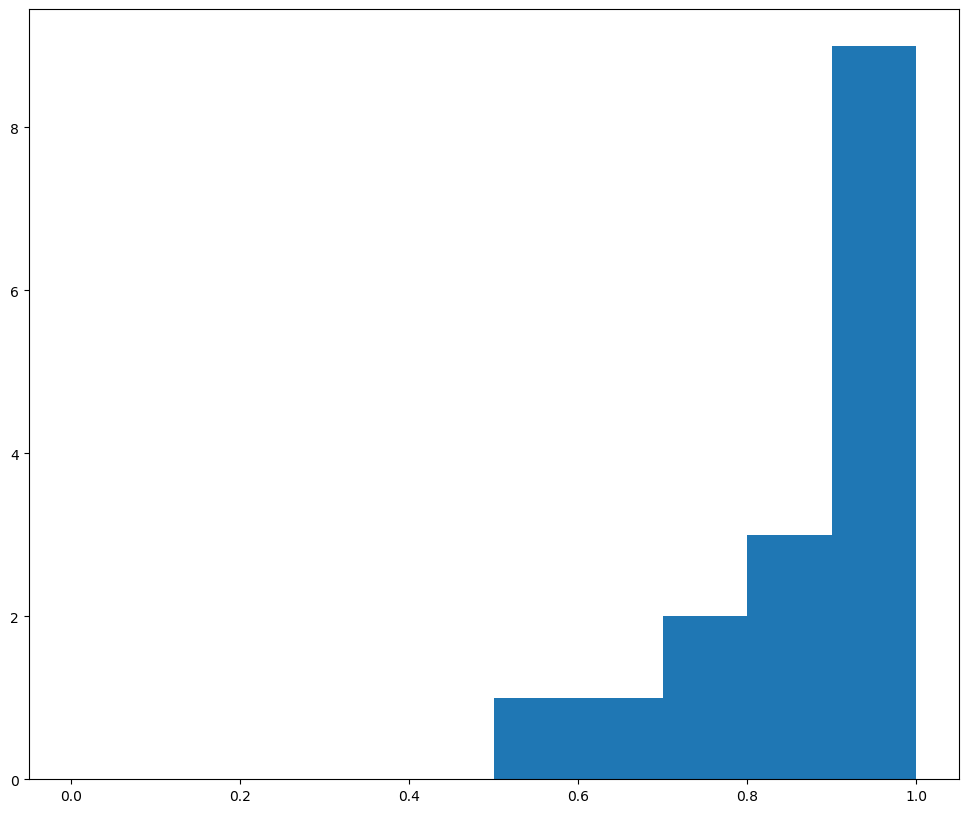

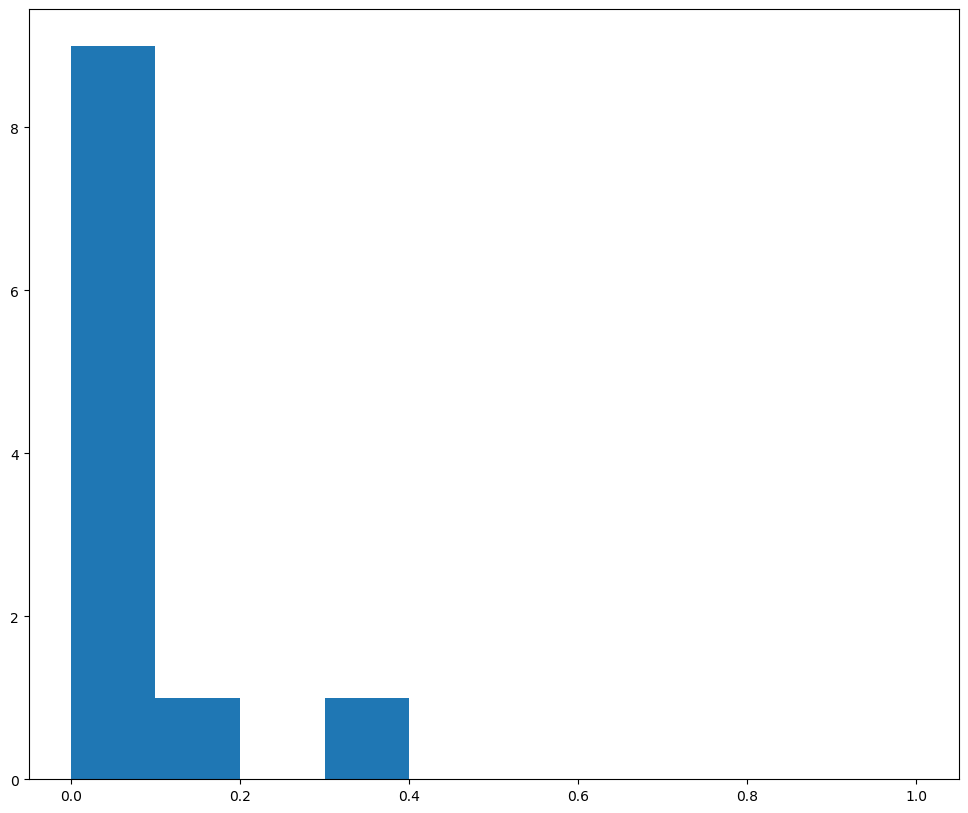

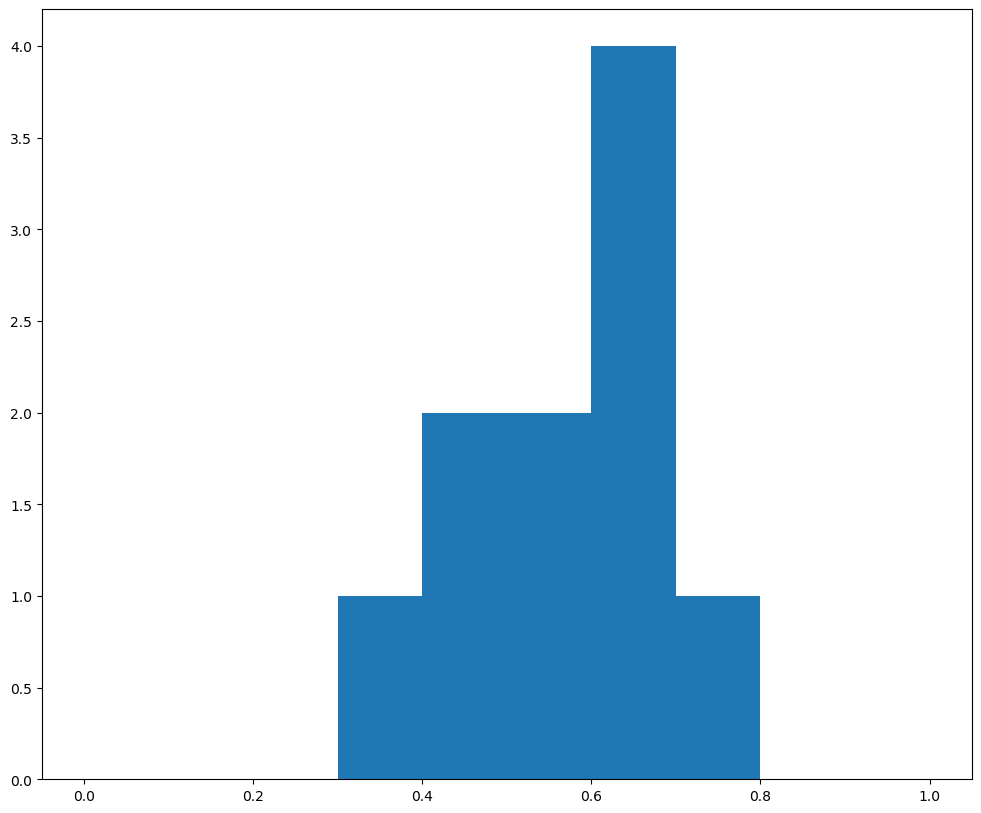

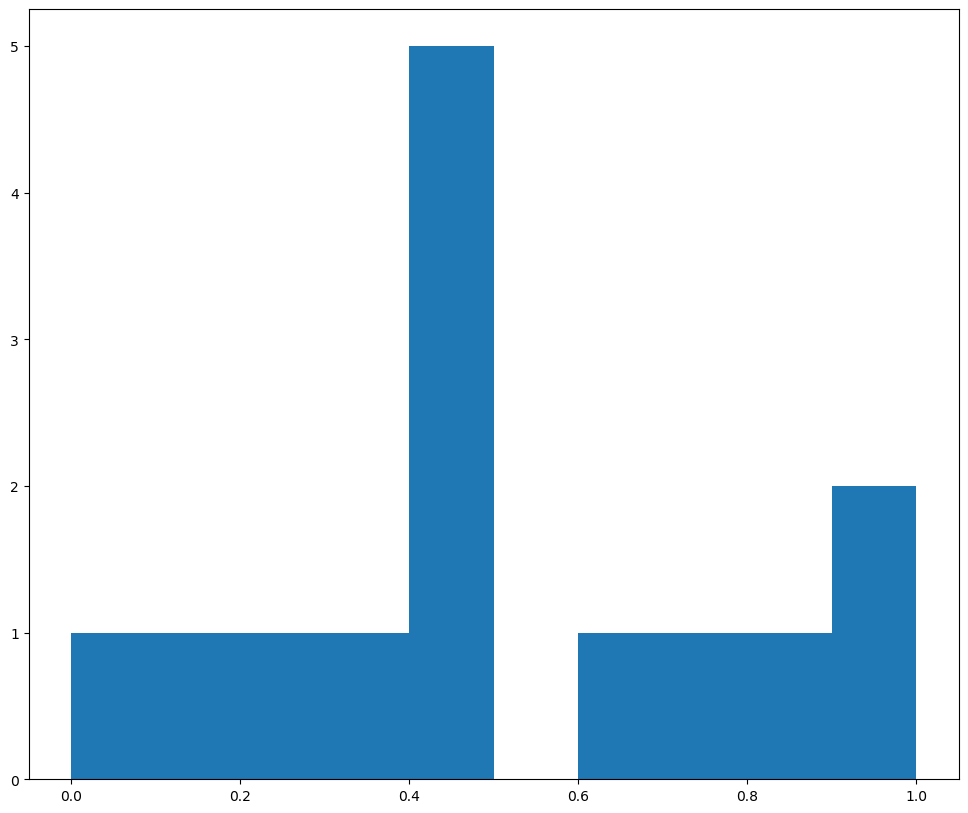

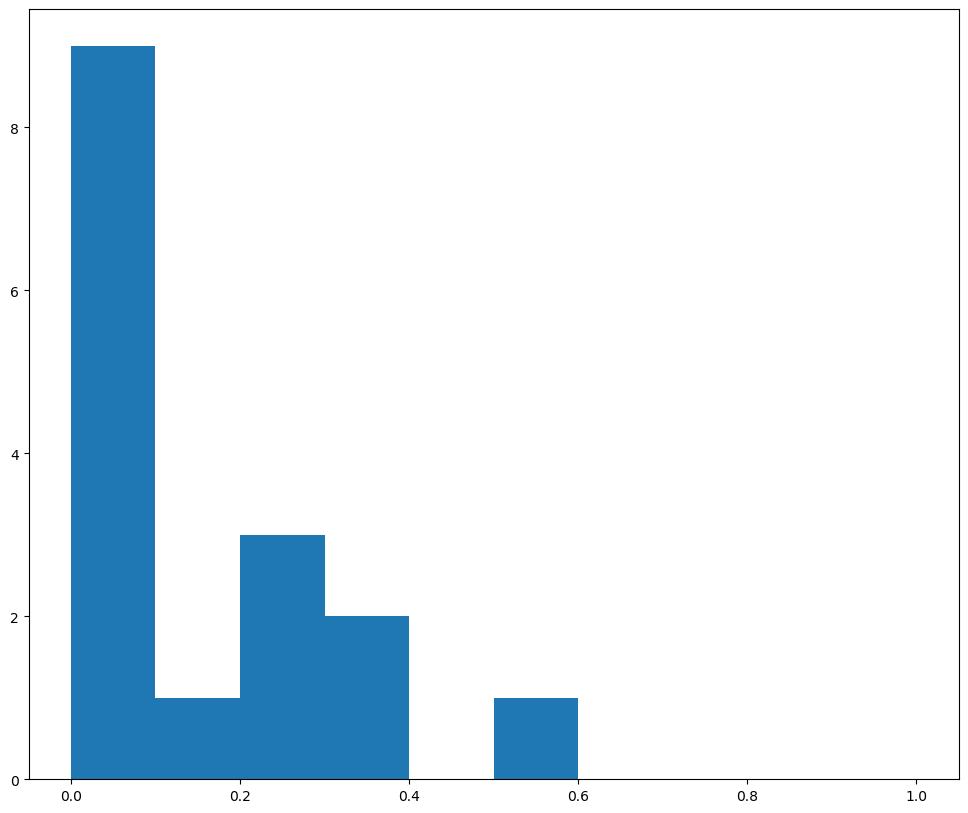

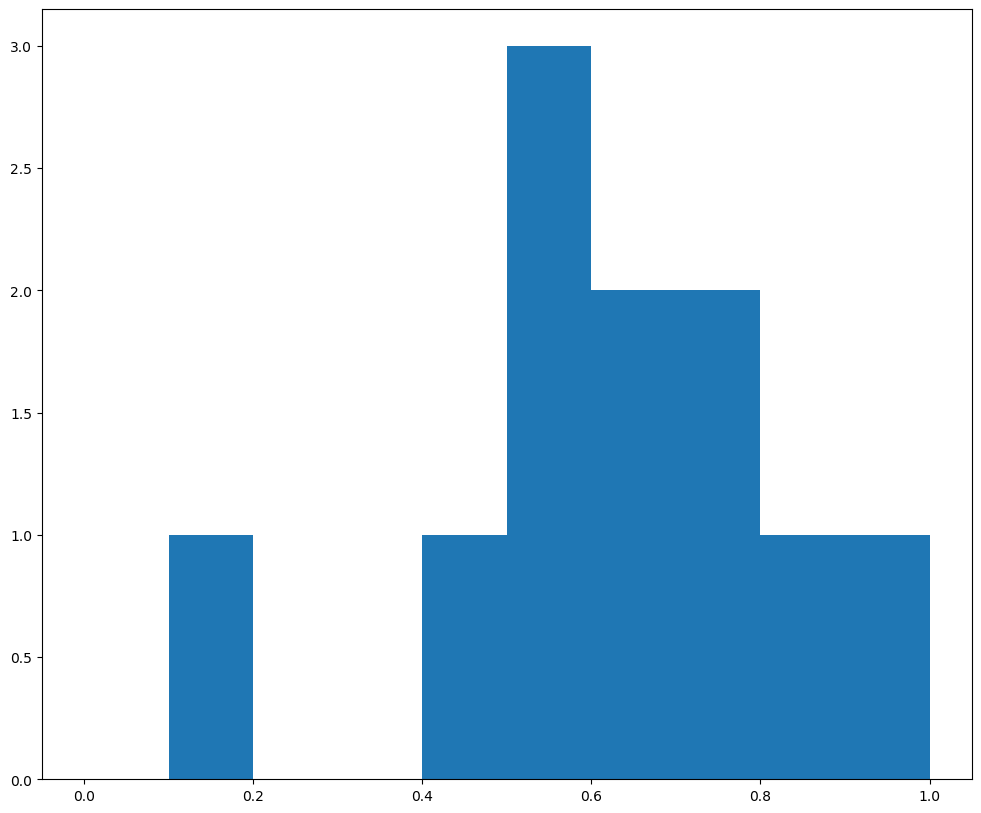

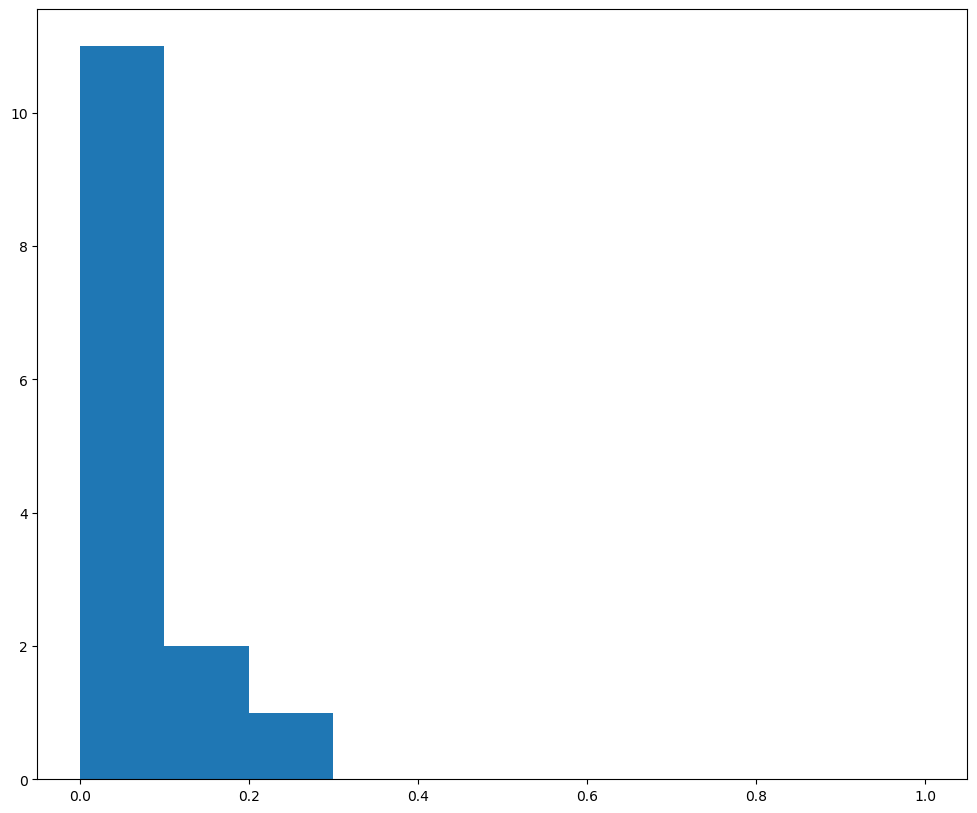

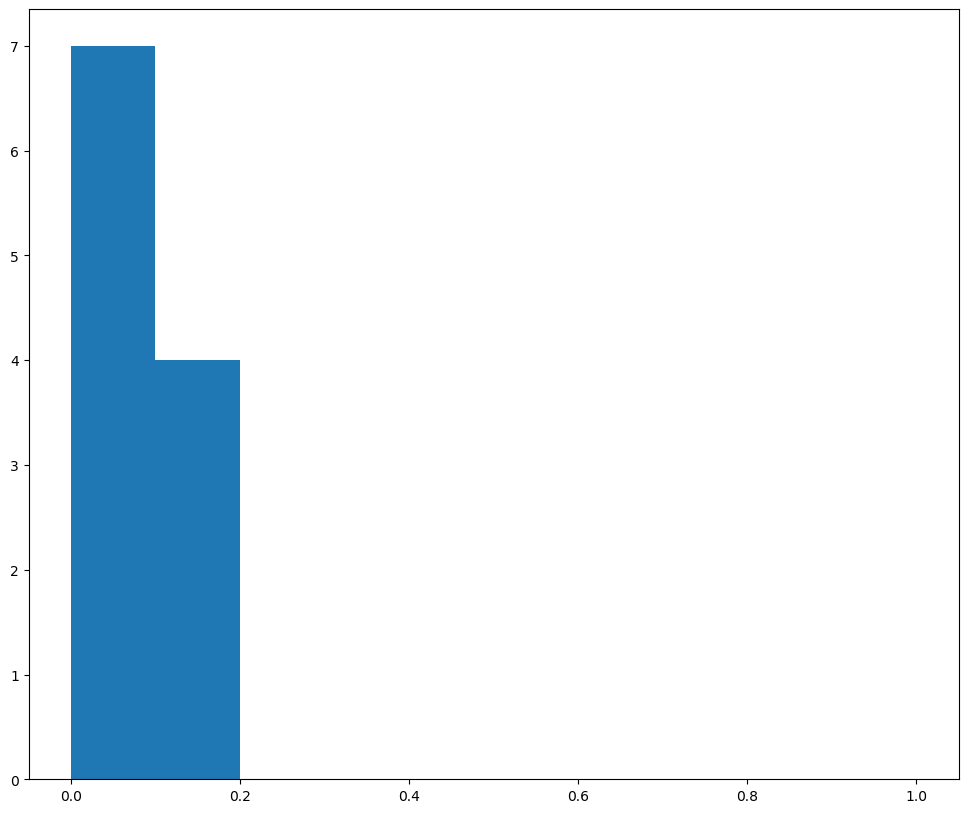

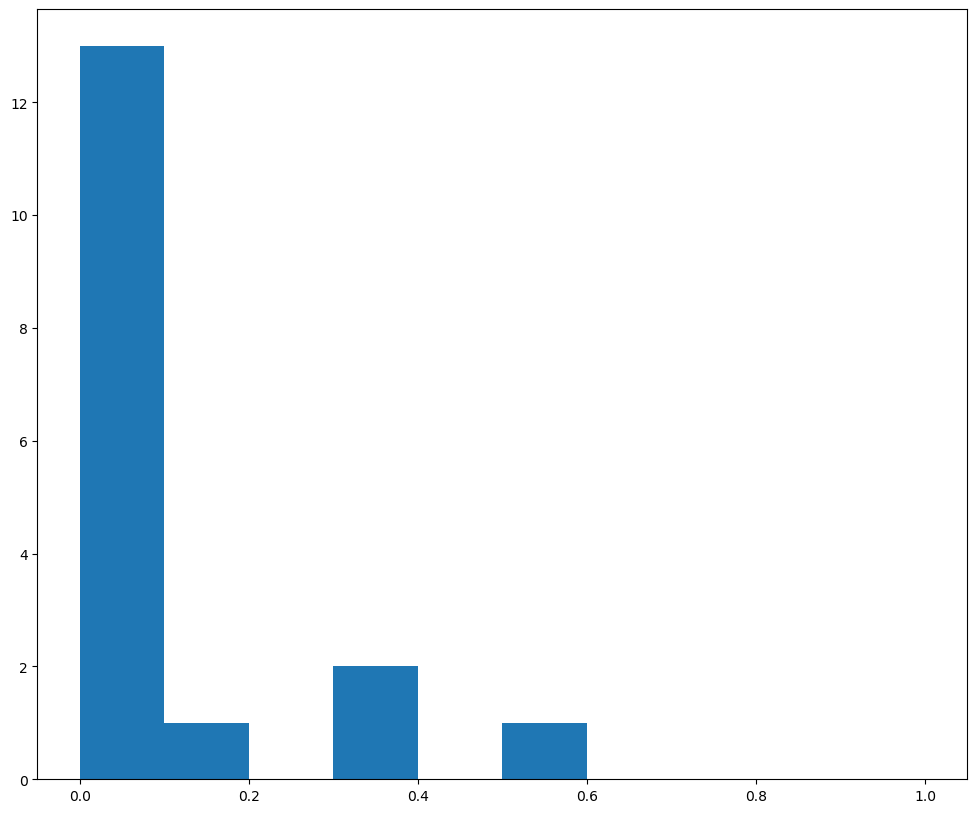

In [27]:
for x in shalek_PSI_good.index:
    plt.hist(shalek_PSI_good.loc[x].dropna(), range=[0,1])
    plt.show()

/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: Matpl

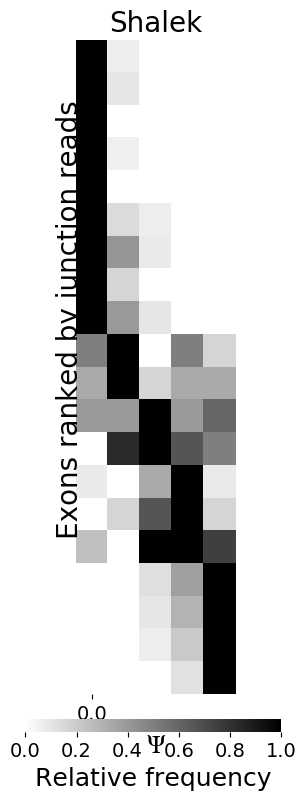

In [28]:
shalek_hist_complete_f, shalek_hist_intermediate_f = scp.get_bins_table2(shalek_PSI_filtered, mrna_filtered, 0.2)


import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

hist_list = [shalek_hist_complete_f]

dset_name_list = ['Shalek']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_shalek',
                    plot_title = "", 
                    ylab='Exons ranked by junction reads', ls=18, sk=1.65, tfs=20)

plt.show()

In [29]:
[x for x in shalek_PSI.index if 'Clec7a' in x]

['Clec7a_other_1']

In [9]:
[x for x in shalek_PSI.index if 'Sat1' in x]

NameError: name 'shalek_PSI' is not defined

In [31]:
[x for x in shalek_PSI.index if 'Irf7' in x]

['Irf7_1']

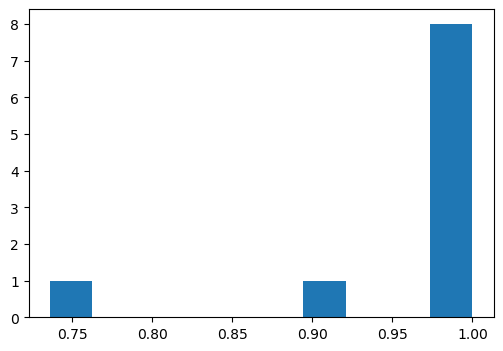

In [32]:
figsize(6,4)
plt.hist(shalek_PSI.loc['Irf7_1'].dropna())
plt.show()

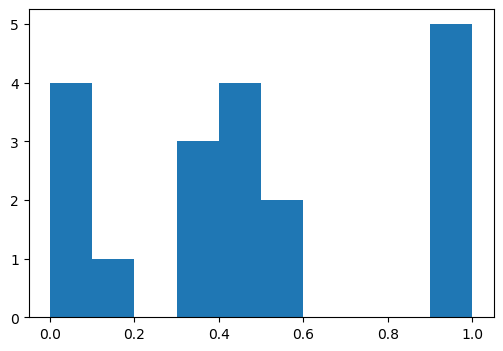

In [33]:
figsize(6,4)
plt.hist(shalek_PSI.loc['Irgm1_1'].dropna())
plt.show()

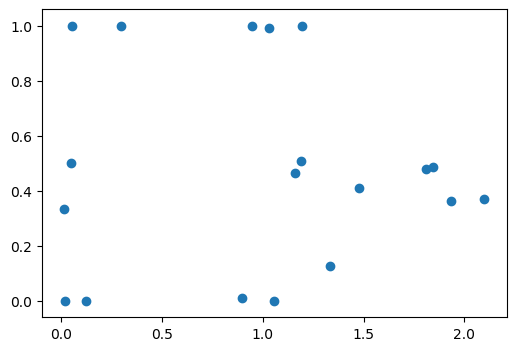

In [34]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Irgm1_1']+1), shalek[3].loc['Irgm1_1',  mrna_per_event_shalek.columns])
plt.show()

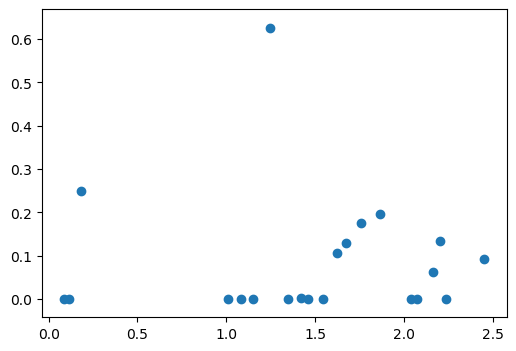

In [35]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Clec7a_other_1']+1), 
            shalek_PSI.loc['Clec7a_other_1', mrna_per_event_shalek.columns])
plt.show()

(array([13.,  2.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.        , 0.06264237, 0.12528474, 0.18792711, 0.25056948,
        0.31321185, 0.37585421, 0.43849658, 0.50113895, 0.56378132,
        0.62642369]),
 <a list of 10 Patch objects>)

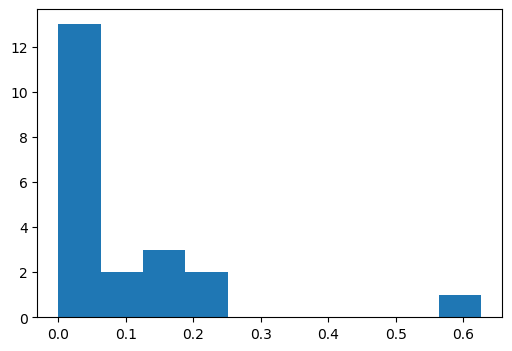

In [36]:
figsize(6,4)
plt.hist(shalek_PSI.loc['Clec7a_other_1'])

In [37]:
len(shalek_PSI.loc['Clec7a_other_1'])

21

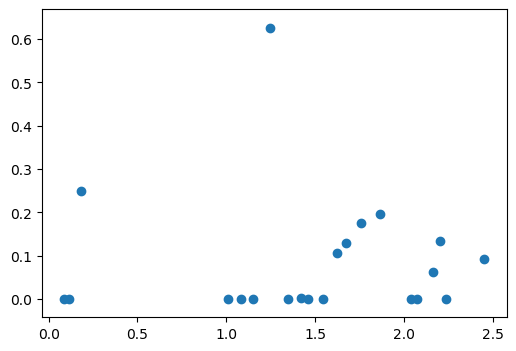

In [38]:
figsize(6,4)
plt.scatter(np.log10(mrna_per_event_shalek.loc['Clec7a_other_1']+1), 
            shalek_PSI.loc['Clec7a_other_1', mrna_per_event_shalek.columns])
plt.show()

In [39]:
(shalek_PSI.loc['Clec7a_other_1']> 0.1).sum()

7

In [40]:
[x for x in shalek_PSI.index if 'Acpp' in x]

['Acpp_AE']

(array([4., 0., 0., 0., 1., 0., 1., 1., 1., 8.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

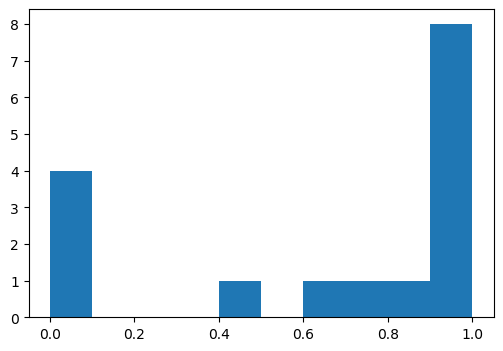

In [41]:
figsize(6,4)
plt.hist(shalek_PSI.loc['Acpp_AE'].dropna())

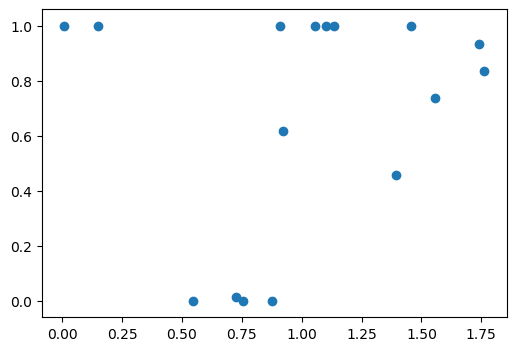

In [42]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Acpp_AE']+1), 
            shalek_PSI.loc['Acpp_AE', mrna_per_event_shalek.columns])
plt.show()

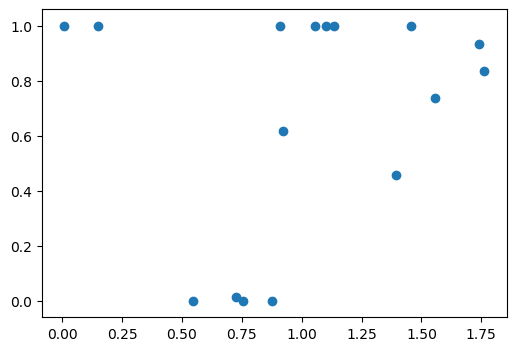

In [43]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Acpp_AE']+1), shalek_PSI.loc['Acpp_AE', mrna_per_event_shalek.columns])
plt.show()

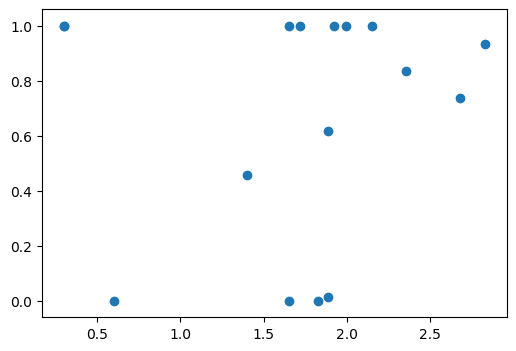

In [44]:
plt.scatter(np.log10(shalek_read_counts.loc['Acpp_AE', mrna_per_event_shalek.columns]+1), 
            shalek_PSI.loc['Acpp_AE', mrna_per_event_shalek.columns])
plt.show()

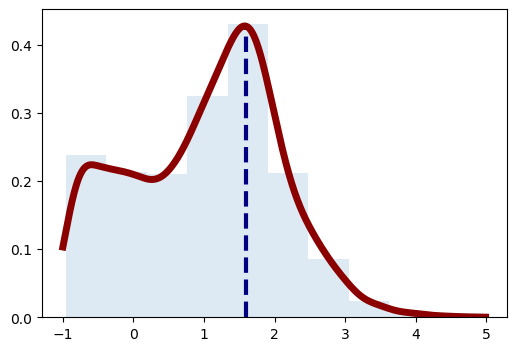

Skipping cell


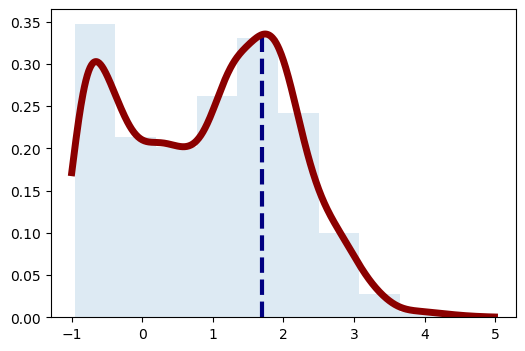

Skipping cell


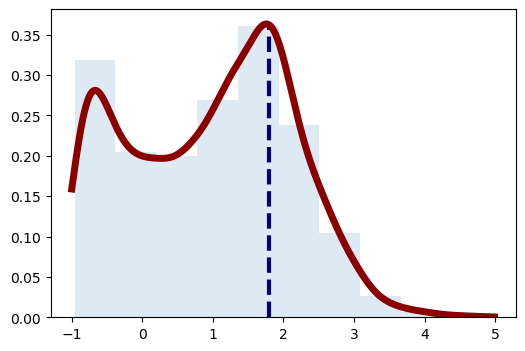

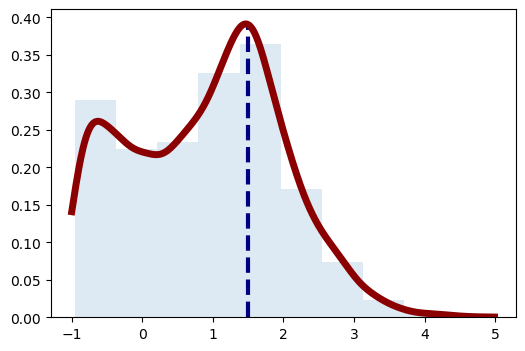

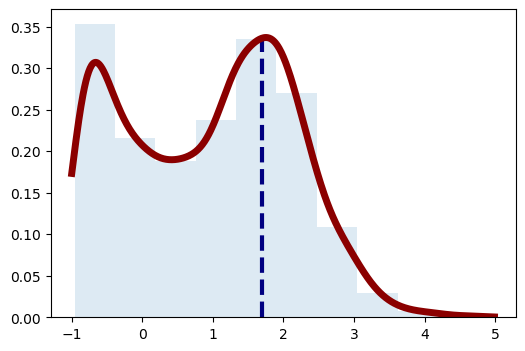

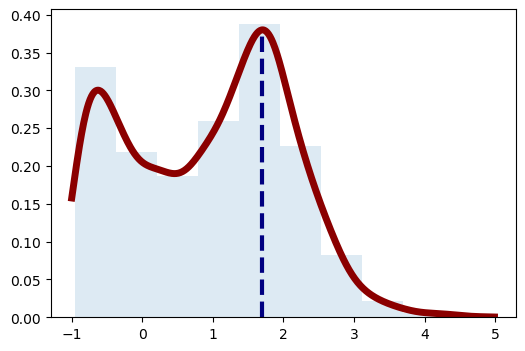

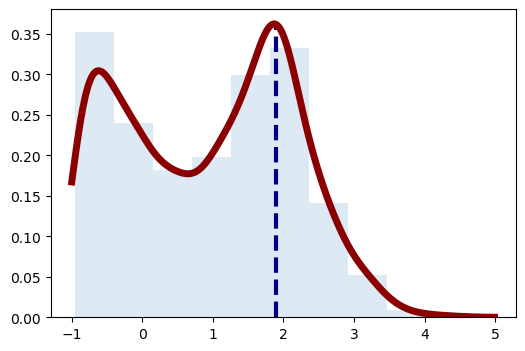

Skipping cell
Skipping cell
Skipping cell
Skipping cell


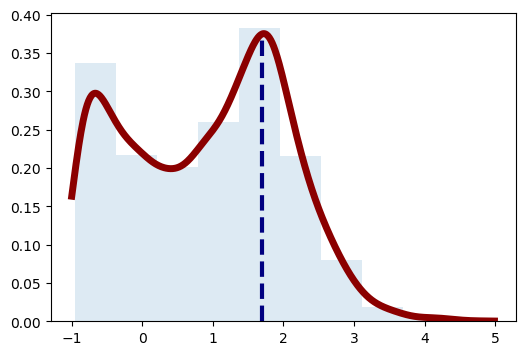

Skipping cell


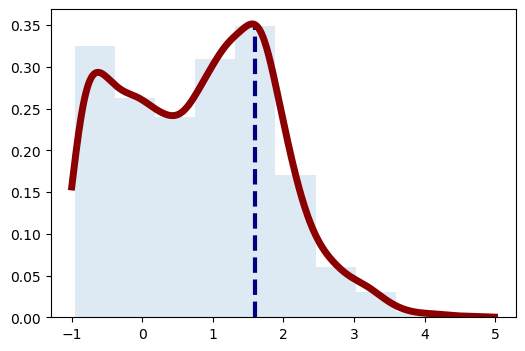

Skipping cell


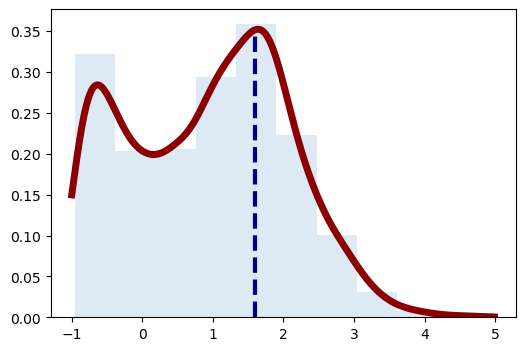

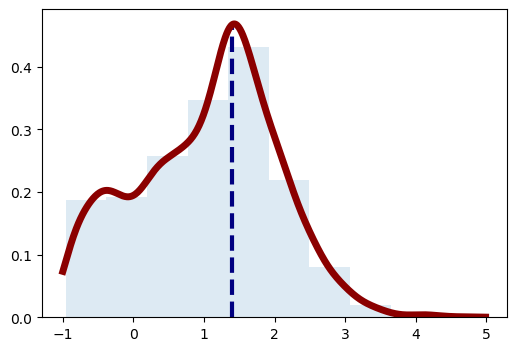

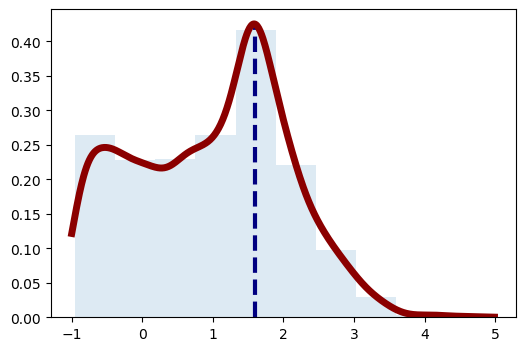

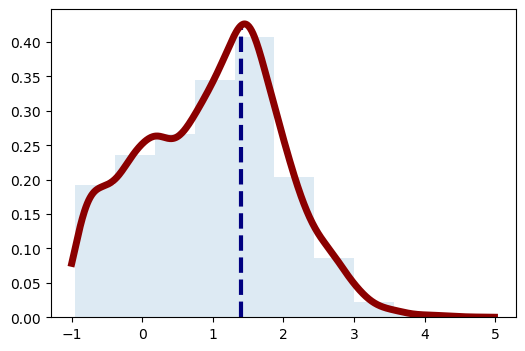

In [45]:
shalek_mrna_counts = spu.transform_tpm_to_counts(shalek_tpm_tab, plot_hist = True, correct_high = True, adjust_high=False)

In [46]:
shalek_common_genes = [gene for gene in shalek_rsem_tab.index if ((gene in shalek_mrna_counts.index) & (gene in shalek_el.index))]
shalek_cells = shalek_mrna_counts.columns
shalek_counts_tab = shalek_rsem_tab.loc[shalek_common_genes, shalek_cells]
shalek_mrna_tab = shalek_mrna_counts.loc[shalek_common_genes, shalek_cells]
shalek_el_tab = shalek_el.loc[shalek_common_genes, shalek_cells]


shalek_counts_tab.columns = [x.split('_')[0] for x in shalek_counts_tab]
shalek_mrna_tab.columns = [x.split('_')[0] for x in shalek_mrna_tab]
shalek_el_tab.columns = [x.split('_')[0] for x in shalek_el_tab]

shalek_c = ((shalek_counts_tab*(shalek_mrna_tab > 0)*202).sum()/(shalek_mrna_tab*shalek_el_tab).sum())

In [47]:

shalek_SR = shalek_c
mrna_per_event_shalek = shalek_mrna_counts.loc[[x.split('_')[0] for x in shalek_PSI.index if (x.split('_')[0] in shalek_mrna_counts.index)]]
mrna_per_event_shalek.index = [x for x in shalek_PSI.index if (x.split('_')[0] in shalek_mrna_counts.index)]
mrna_per_event_shalek.columns = [x.split('_')[0] for x in mrna_per_event_shalek.columns]


shalek_int_genes, shalek_int_exons = spu.get_int_events(shalek_PSI, shalek_mrna_counts, 0.05)
shalek_int_exons = [x for x in shalek_int_exons if x in mrna_per_event_shalek.index]


reads_shalek, mrna_shalek, binary_shalek, psi_shalek = spu.get_dataset_averages(shalek_PSI, shalek_read_counts, 
                                                                          shalek_mrna_counts, shalek_int_exons)

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return bound(*args, **kwds)


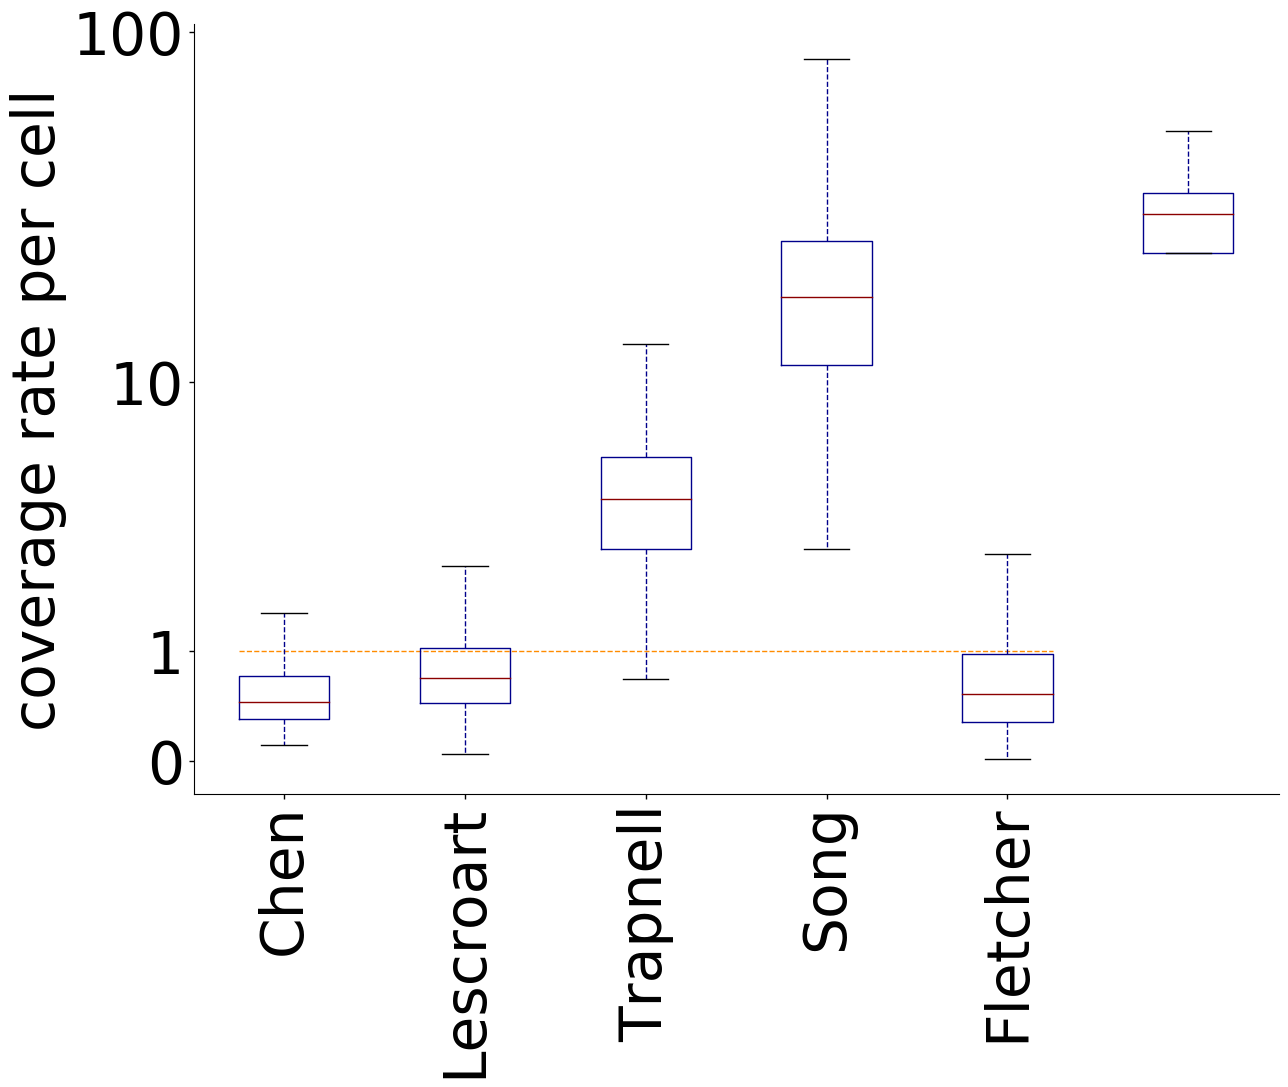

In [48]:
dset_names = ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Fletcher', 'Shalek']

scp.plot_boxplot([np.log10(chen_c+1),np.log10(lescroart_c+1), np.log10(trapnell_c+1), np.log10(song_c+1), np.log10(das_c+1),
                 np.log10(shalek_c+1)], 
                 'coverage rate per cell', dset_names, 
                 'Cj_per_cell_shalek_drop_cell', ylocs = [0, np.log10(2), np.log10(11), np.log10(101)],
                 ytags = ['0', '1', '10', '100'], plot_line = np.log10(2), save_dir='plots2/figure3/')

plt.show()

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return bound(*args, **kwds)


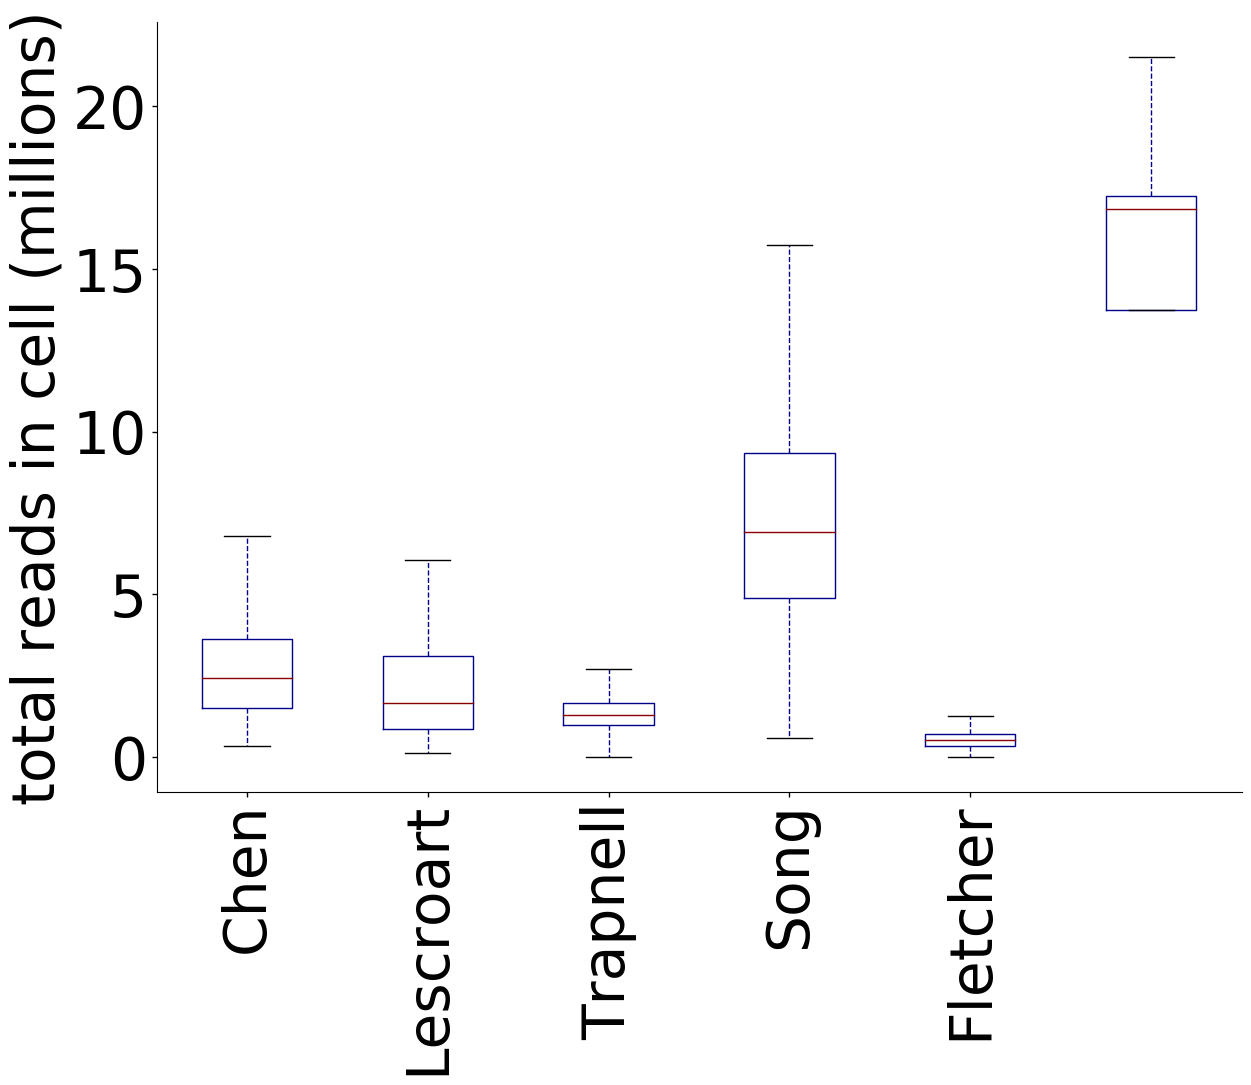

In [49]:
read_counts_chen = chen_rsem_tab[chen_mrna_counts.columns].sum(axis=0)
read_counts_song = song_rsem_tab[song_mrna_counts.columns].sum(axis=0)
read_counts_trapnell = trapnell_rsem_tab[trapnell_mrna_counts.columns].sum(axis=0)
read_counts_lescroart = lescroart_rsem_tab[lescroart_mrna_counts.columns].sum(axis=0)
read_counts_das = das_rsem_tab[das_mrna_counts.columns].sum(axis=0)
read_counts_shalek = shalek_rsem_tab[shalek_mrna_counts.columns].sum(axis=0)

reads_df = [read_counts_chen, read_counts_lescroart, read_counts_trapnell, 
                      read_counts_song, read_counts_das, read_counts_shalek]


scp.plot_boxplot(reads_df, 'total reads in cell (millions)', dset_names, 'total_reads_boxplot_shalek_drop_cell', 
                 ylocs =[0, 5000000, 10000000, 15000000, 20000000], 
                 ytags = ['0', '5', '10', '15', '20'], save_dir='plots/figure3/')


plt.show()

391
27


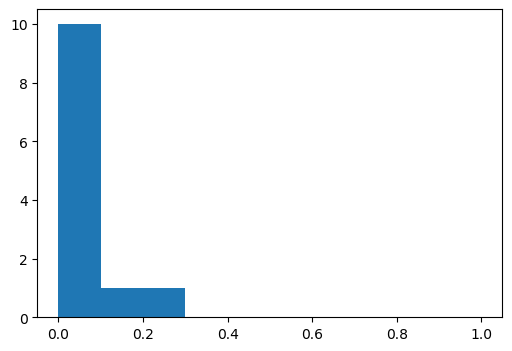

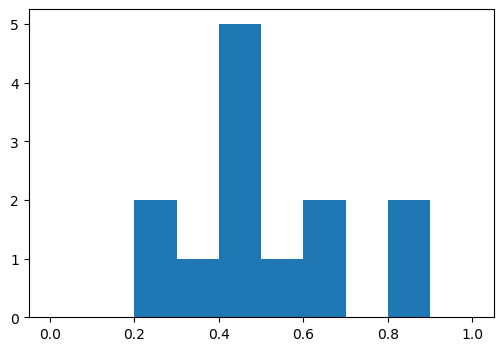

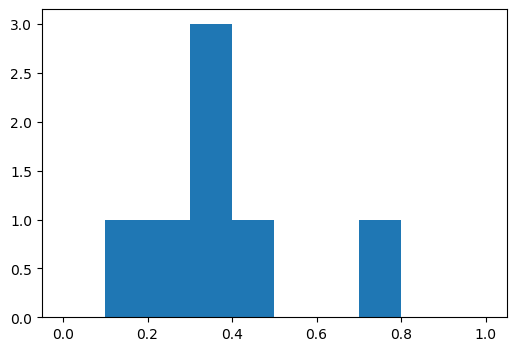

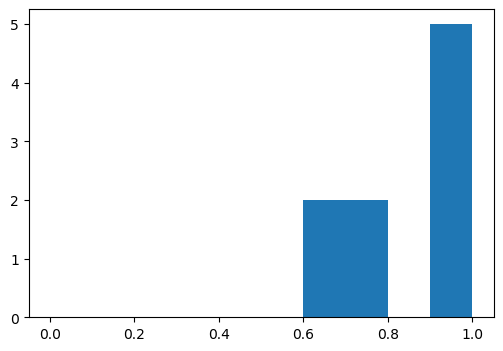

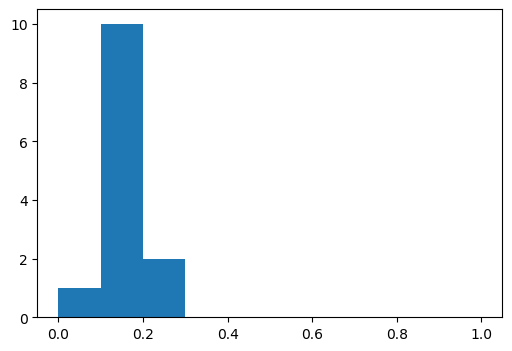

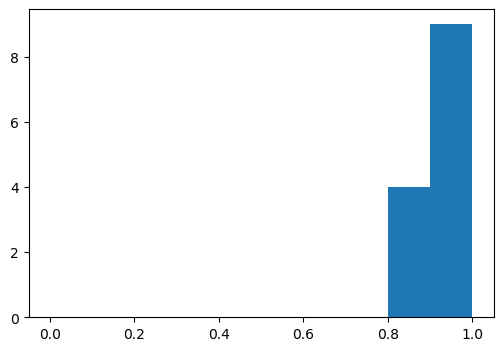

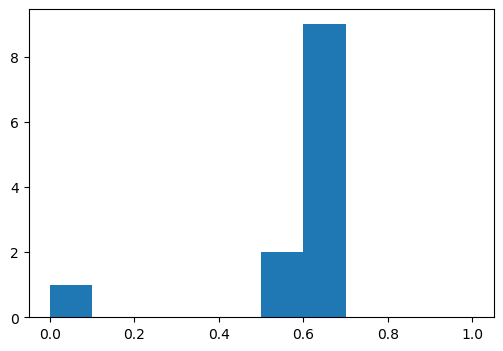

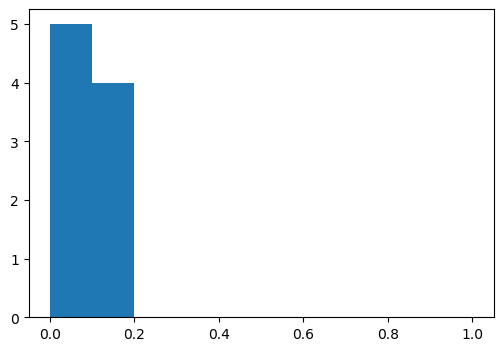

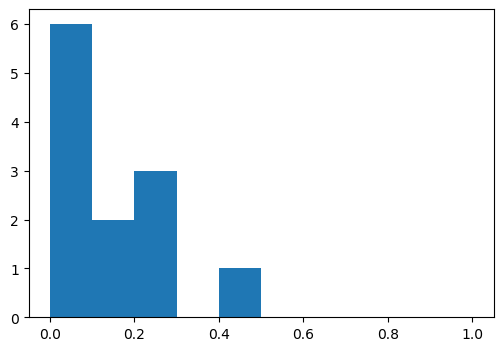

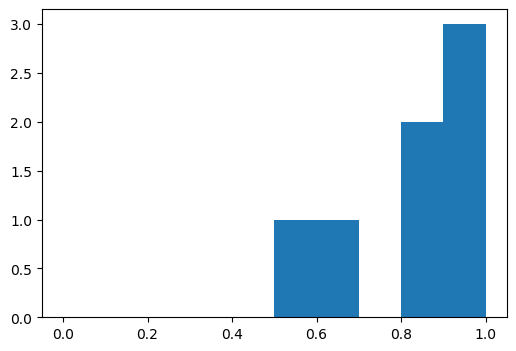

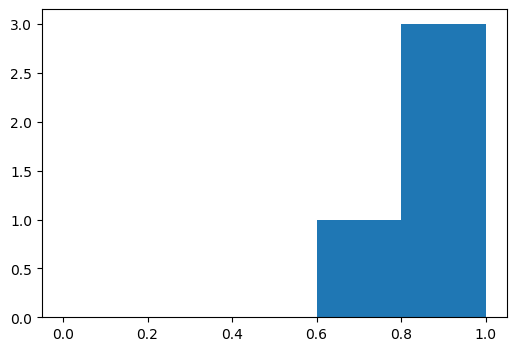

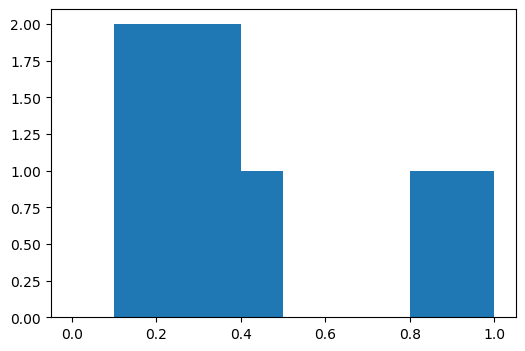

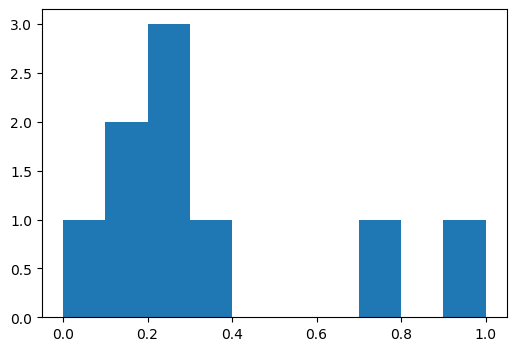

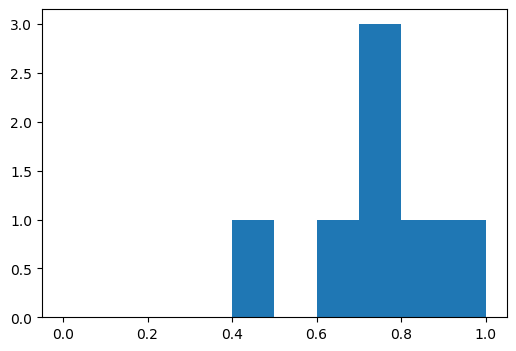

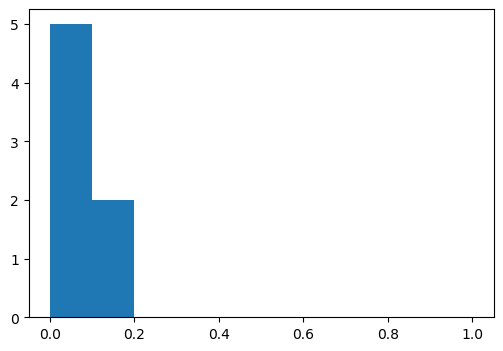

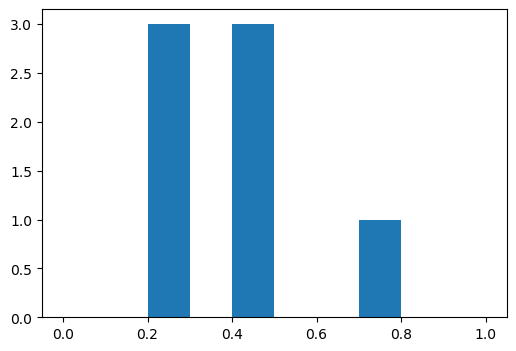

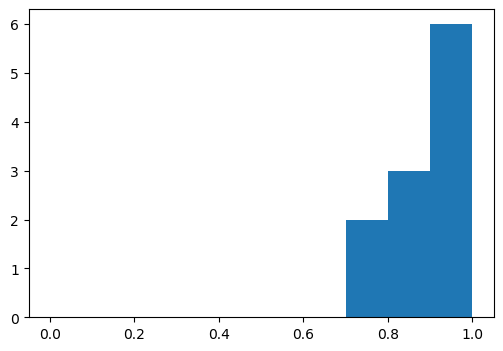

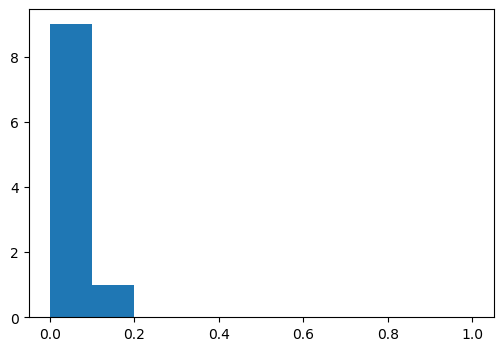

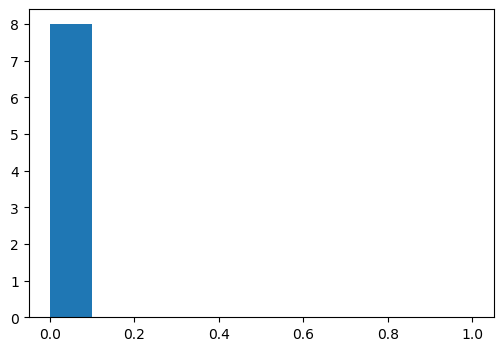

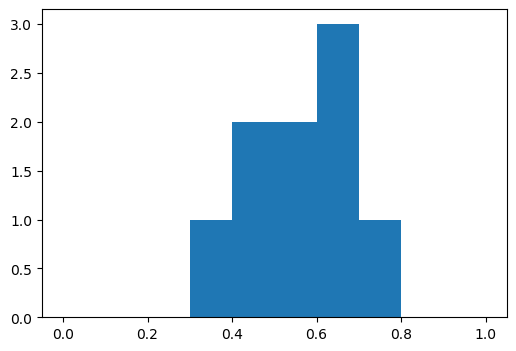

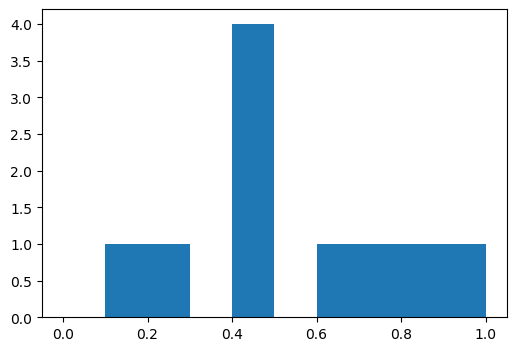

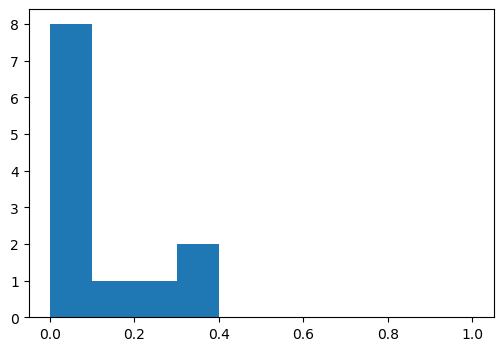

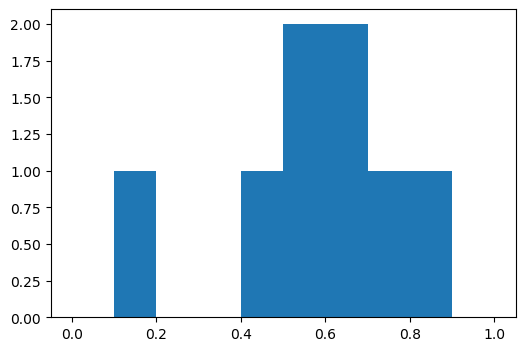

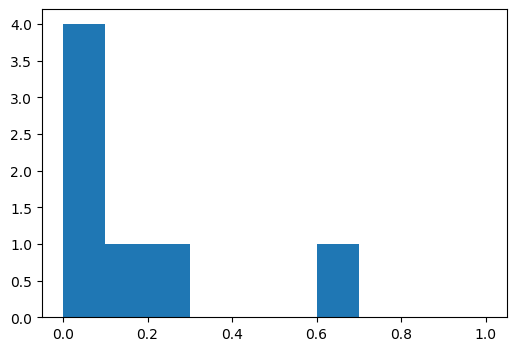

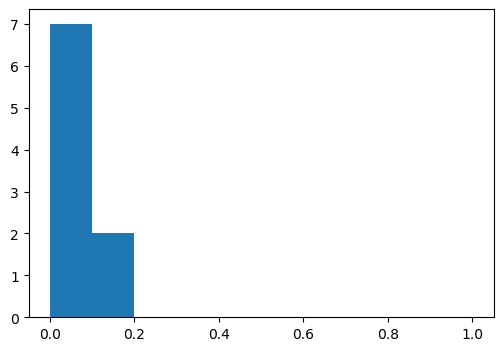

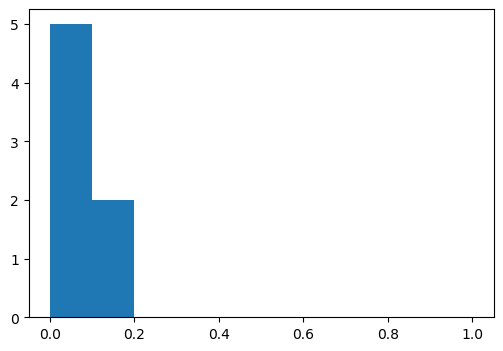

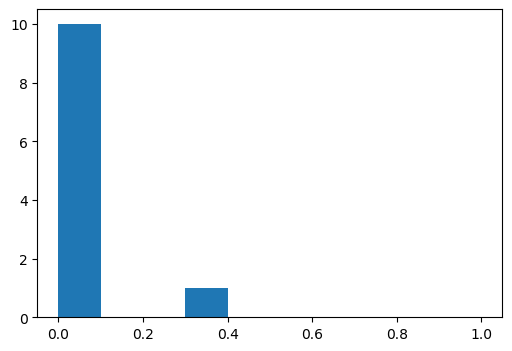

In [50]:
shalek_int_genes, shalek_int_exons = spu.get_int_events(shalek_PSI, shalek_mrna_counts, 0.05)
shalek_int_exons = [x for x in shalek_int_exons if x in mrna_per_event_shalek.index]
shalek_PSI_filtered, shalek_PSI_mrna_filtered, shalek_good_exons, mrna_filtered, reads_filtered = filter_psi(shalek_PSI, 
                                            shalek_int_exons, mrna_per_event_shalek, shalek_c, shalek_read_counts, 10,
                                                                       cell_min=0.5)

good_cells = shalek_PSI_filtered.columns[shalek_PSI_filtered.isna().mean() <= 0.5]
shalek_PSI_good = shalek_PSI_filtered[good_cells]

for x in shalek_PSI_good.index:
    plt.hist(shalek_PSI_good.loc[x].dropna(), range=[0,1])
    plt.show()

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: Matpl

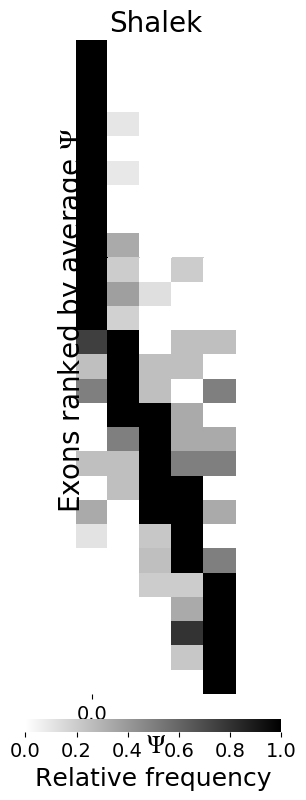

In [51]:
shalek_hist_complete_f, shalek_hist_intermediate_f = scp.get_bins_table2(shalek_PSI_filtered, mrna_filtered, 0.2)


import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

hist_list = [shalek_hist_complete_f]

dset_name_list = ['Shalek']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_shalek_drop_cell',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20)

plt.show()

In [52]:
shalek_PSI_filtered.shape

(27, 13)

In [53]:
len(shalek_c)

13

In [54]:
len(read_counts_shalek)

13

In [55]:
shalek_PSI_good.shape

(27, 13)

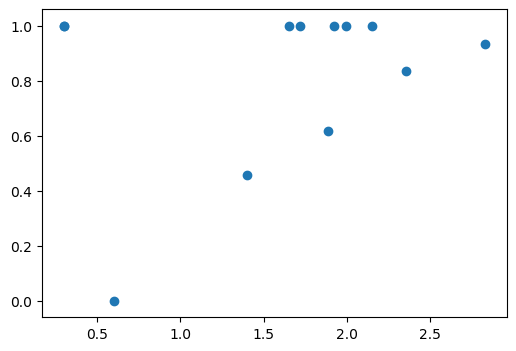

In [56]:
figsize(6,4)
plt.scatter(np.log10(shalek_read_counts.loc['Acpp_AE', mrna_per_event_shalek.columns]+1), 
            shalek_PSI.loc['Acpp_AE', mrna_per_event_shalek.columns])
plt.show()

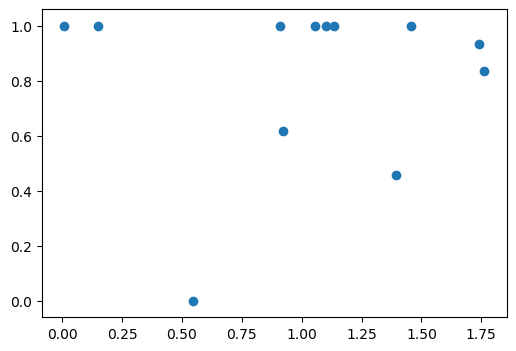

In [57]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Acpp_AE']+1), shalek_PSI.loc['Acpp_AE', mrna_per_event_shalek.columns])
plt.show()

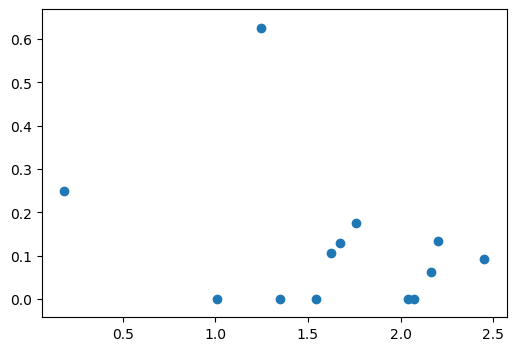

In [58]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Clec7a_other_1']+1), 
            shalek_PSI.loc['Clec7a_other_1', mrna_per_event_shalek.columns])
plt.show()

(array([6., 2., 3., 1., 0., 0., 0., 0., 0., 1.]),
 array([0.        , 0.06264237, 0.12528474, 0.18792711, 0.25056948,
        0.31321185, 0.37585421, 0.43849658, 0.50113895, 0.56378132,
        0.62642369]),
 <a list of 10 Patch objects>)

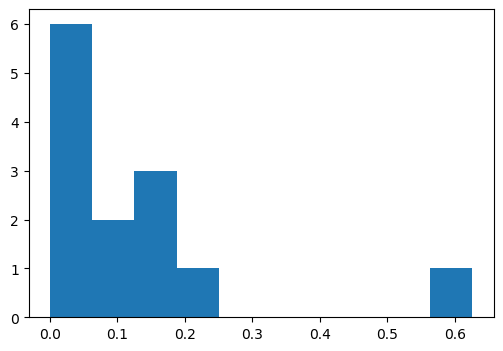

In [59]:
figsize(6,4)
plt.hist(shalek_PSI.loc['Clec7a_other_1', mrna_per_event_shalek.columns])

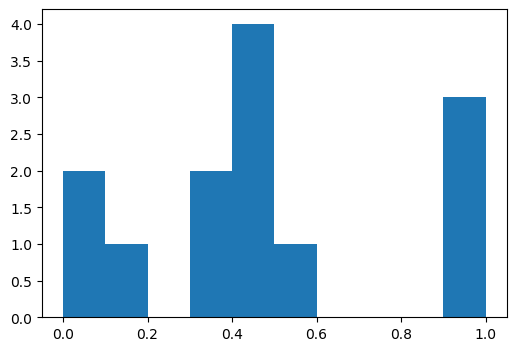

In [60]:
figsize(6,4)
plt.hist(shalek_PSI.loc['Irgm1_1', mrna_per_event_shalek.columns].dropna())
plt.show()

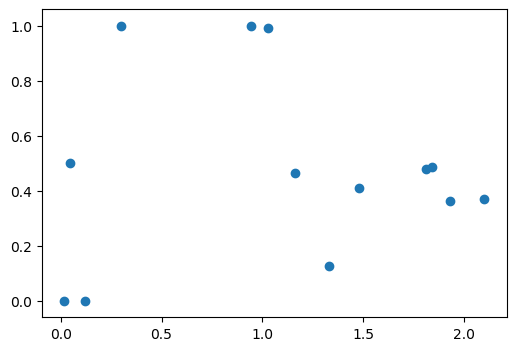

In [61]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Irgm1_1']+1), 
            shalek_PSI.loc['Irgm1_1', mrna_per_event_shalek.columns])
plt.show()

In [1]:
import seaborn as sns

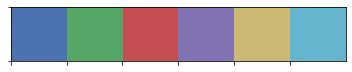

In [7]:
current_palette = sns.color_palette('deep')
sns.palplot(current_palette)

In [1]:
len(current_palette)

NameError: name 'current_palette' is not defined